In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

In [2]:
# Load the datasets
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

# Part 1: Exploration

In [4]:
# Display the first few rows of the train dataset
train_df.head()


,ID,worked_in_the_past,age_group,disability,is_dev,education,sex,mental_issues,years_of_experience,A,B,C,D,country,prev_salary,stack_experience,label
0,65168,T,young,No,developer,NaN,Male,No,13.0,-1.093080,1.0,aa,180.984266,NaN,67104.0,Bash/Shell;Java;JavaScript;PowerShell;Python;T...,1
1,38314,T,young,No,non-developer,other,Male,Yes,7.0,5.444533,7.0,rhz,180.677533,United States of America,101000.0,Bash/Shell;JavaScript;PowerShell;Python;Docker...,0
2,5209,T,old,No,developer,other,Male,Yes,25.0,1.727255,15.0,aa,177.746162,United States of America,70000.0,Bash/Shell;HTML/CSS;Java;JavaScript;PHP;SQL;Gi...,0
3,54165,T,young,NaN,developer,other,Male,No,10.0,17.804302,7.0,aa,176.952584,Spain,40956.0,C#;Dart;Delphi;Kotlin;SQL;VBA;Docker;Unity 3D;...,0
4,42213,T,young,No,developer,BA/BSc,Male,No,12.0,-8.679091,4.0,hr,179.393259,Canada,101509.0,Assembly;Bash/Shell;C++;PowerShell;Python;Rust,0


Seems the dataset contains a mix of categorical and numerical features.

In [5]:
# Print all the columns
train_df.dtypes

ID                       int64
worked_in_the_past      object
age_group               object
disability              object
is_dev                  object
education               object
sex                     object
mental_issues           object
years_of_experience    float64
A                      float64
B                      float64
C                       object
D                      float64
country                 object
prev_salary            float64
stack_experience        object
label                    int64
dtype: object

Data Types are int, float and object

In [6]:
# Basic statistics of the train dataset
train_stats = train_df.describe()
train_stats

,ID,years_of_experience,A,B,D,prev_salary,label
count,55462.000000,52898.000000,53327.000000,51927.000000,52843.000000,52798.000000,55462.000000
mean,36709.781292,14.214847,4.003959,9.079612,179.580295,67800.074662,0.536223
std,21205.952730,9.391586,6.392311,7.965858,1.094272,49583.999657,0.498691
min,0.000000,0.000000,-21.637116,0.000000,175.077992,1.000000,0.000000
25%,18388.250000,7.000000,-0.362863,3.000000,178.843985,28800.000000,0.000000
50%,36699.500000,12.000000,3.606089,7.000000,179.584091,57660.000000,1.000000
75%,55049.750000,20.000000,7.852744,12.000000,180.323694,95979.000000,1.000000
max,73461.000000,50.000000,55.495063,50.000000,184.151007,224000.000000,1.000000


The relatively balanced label distribution is beneficial for binary classification tasks.

In [3]:
# Visualize the distribution of numeric features
numeric_features = train_df.select_dtypes(include=[np.number]).columns.tolist()
numeric_features

['ID', 'years_of_experience', 'A', 'B', 'D', 'prev_salary', 'label']

In [4]:
# Get the categorical columns (data type of 'object' or 'category')
categorical_columns = train_df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Print the categorical columns
print("Categorical columns:", categorical_columns)


Categorical columns: ['worked_in_the_past', 'age_group', 'disability', 'is_dev', 'education', 'sex', 'mental_issues', 'C', 'country', 'stack_experience']


In [5]:
# Calculate the number of missing values per column
missing_values_count = train_df.isnull().sum()

# Calculate the percentage of missing values per column
missing_values_percentage = (missing_values_count / len(train_df)) * 100

# Combine both counts and percentages into a DataFrame for better readability
missing_data = pd.DataFrame({
    'Missing Values': missing_values_count,
    'Percentage': missing_values_percentage
})

# Display columns with missing values
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)
print(missing_data)


                     Missing Values  Percentage
stack_experience              14042   25.318236
disability                     3681    6.636977
B                              3535    6.373733
sex                            3228    5.820201
education                      3016    5.437958
C                              3002    5.412715
prev_salary                    2664    4.803289
D                              2619    4.722152
years_of_experience            2564    4.622985
age_group                      2540    4.579712
mental_issues                  2415    4.354333
A                              2135    3.849483
is_dev                         2090    3.768346
country                        2019    3.640330
worked_in_the_past             1765    3.182359


Seems the most missing vvalues are in stack_experience feature and the least are in worked_in_the_past feature. 

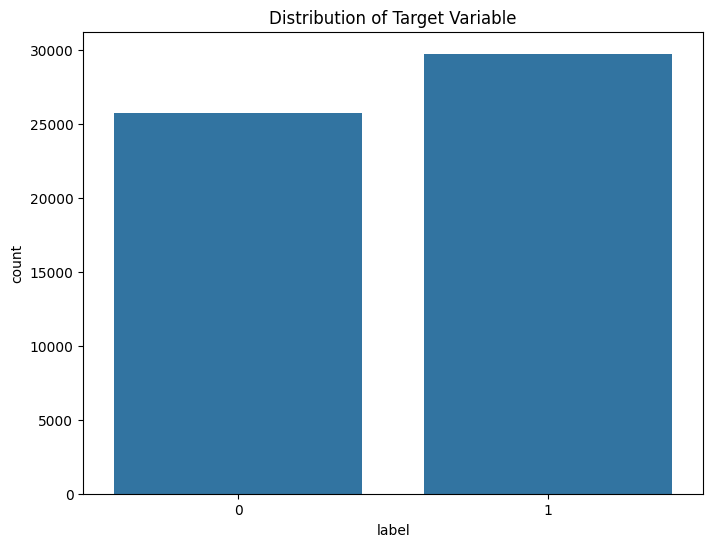

In [6]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x=train_df['label'])  # Assuming 'target' is the column for binary classification
plt.title('Distribution of Target Variable')
plt.show()


The count for label 1 (accepted candidates) is sligtly higher than that for label 0 (rejected candidates). This indicates that the dataset is fairly balanced, with a slight majority of instances where the candidate was accepted. This balance is beneficial for training a classification model, as it helps prevent the model from being biased towards either class.

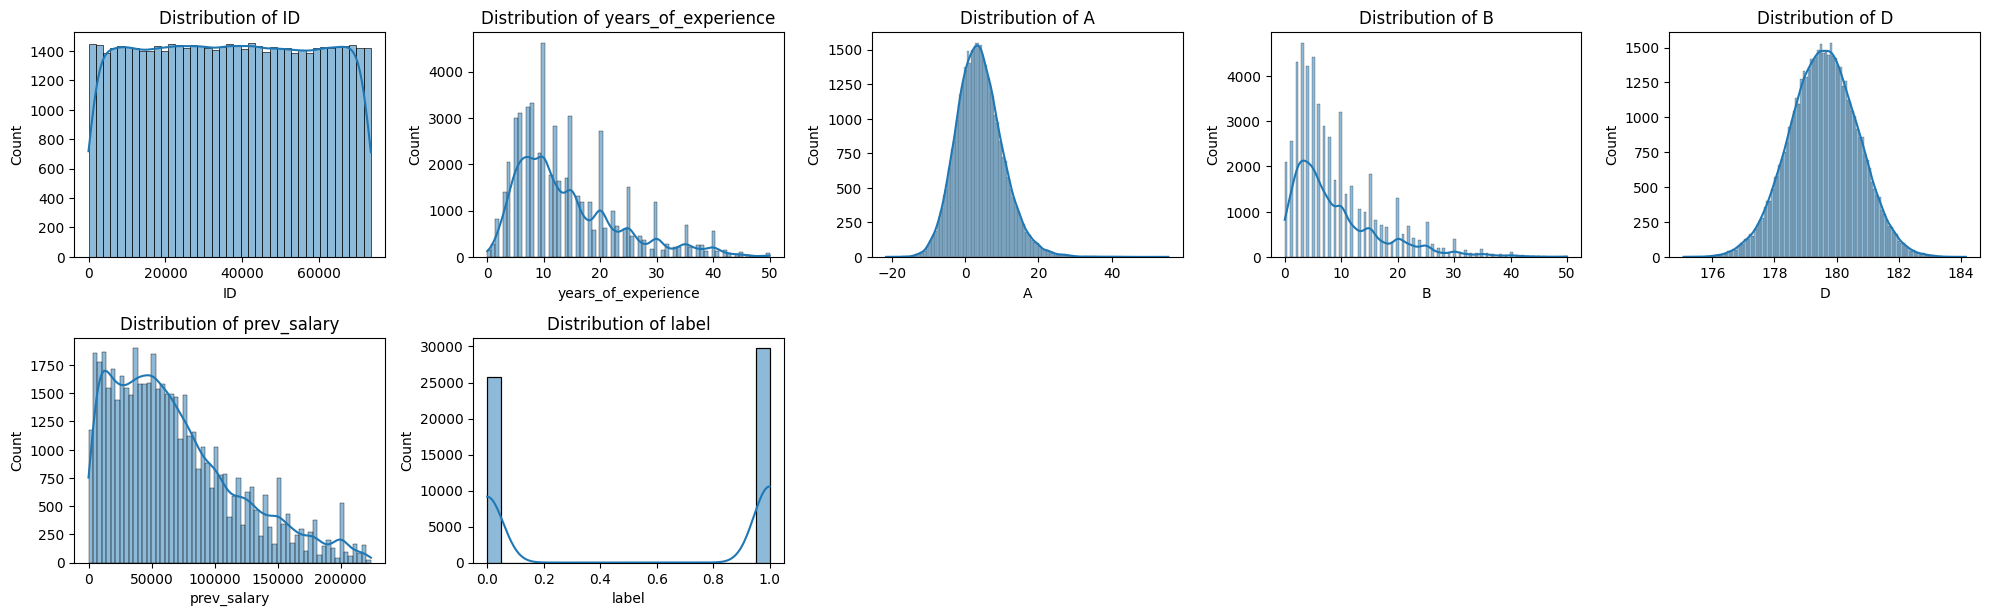

In [7]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_features):
    plt.subplot(5, 5, i+1)
    sns.histplot(train_df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

##### Distribution of Numerical Features
This series of histograms shows the distribution of various numerical features in the dataset:

1. **ID**: The ID column appears uniformly distributed, indicating that IDs are likely randomly assigned without any inherent order. That's why we'll delete it during training as it has no meaning. 
2. **Years of Experience**: This feature shows a right-skewed distribution, with most candidates having less than 20 years of experience. A small number of candidates have very high experience levels.
3. **A**: normal distribution, with most values concentrated in the middle.
3. **B**:  right-skewed, with most values concentrated towards the lower end, suggesting that high values in these columns are rare.
4. **D**: This feature has a near-normal distribution, with most values centered around 180, indicating a very specific range of values.
5. **Previous Salary**: The distribution is heavily right-skewed, indicating that most candidates have lower salaries, with a few earning significantly more.
6. **Number of Technologies**: Most candidates are familiar with a small to moderate number of technologies, with very few candidates knowing an exceptionally large number.

These distributions provide insights into the data's structure, helping in understanding the spread and concentration of values, which can be crucial for feature engineering and model building.


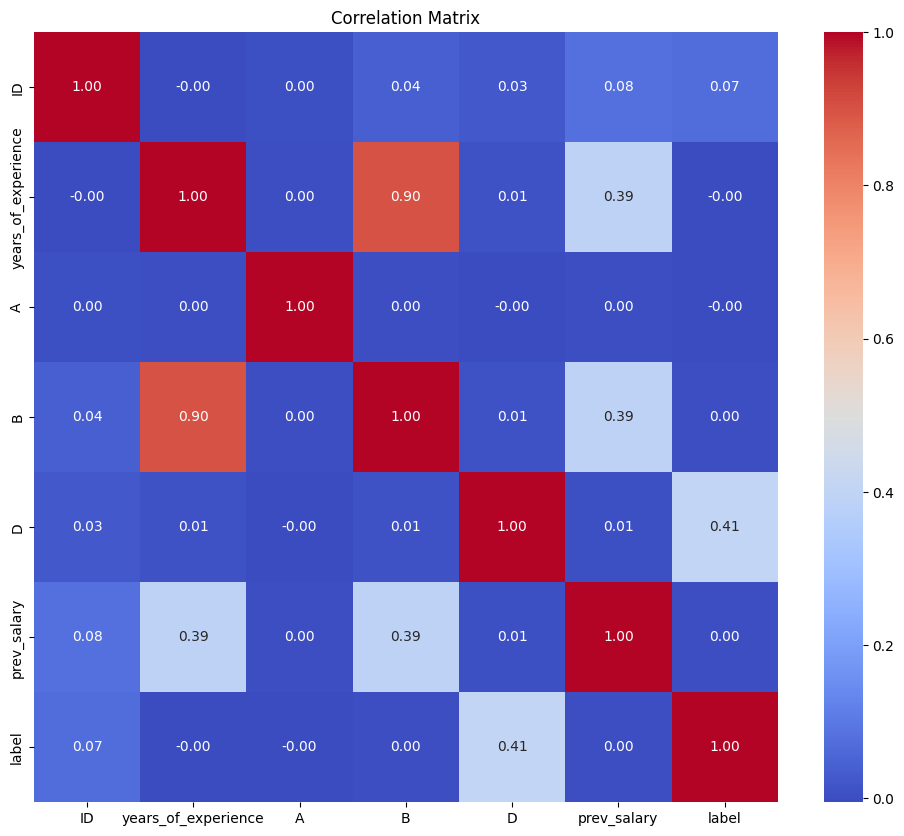

In [8]:
# Select only numeric columns for correlation calculation
numeric_df = train_df.select_dtypes(include=[np.number])

# Check correlations between numeric features and the target variable
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


##### Correlation with the Target Variable (Label)

This correlation matrix highlights the relationships between various numerical features and the target variable, `label`:

- **Label and num_technologies**: The `num_technologies` feature has the highest positive correlation (0.50) with the `label`. This suggests that candidates with experience in more technologies are more likely to be accepted, making this feature a strong predictor.
  
- **Label and D**: The feature `D` shows a moderate positive correlation (0.40) with the `label`. This indicates that higher values in `D` might be associated with a higher likelihood of being accepted.

- **Label and prev_salary**: The correlation between `prev_salary` and `label` is very weak (0.03), suggesting that previous salary might not be a strong predictor of whether a candidate is accepted.

- **Label and Other Features**: The other features, such as `A`, `B`, `years_of_experience`, and `ID`, have near-zero correlations with `label`, indicating little to no linear relationship with the target variable.

Focusing on these correlations helps identify which features may be most useful in predicting the target variable, guiding feature selection for the model.


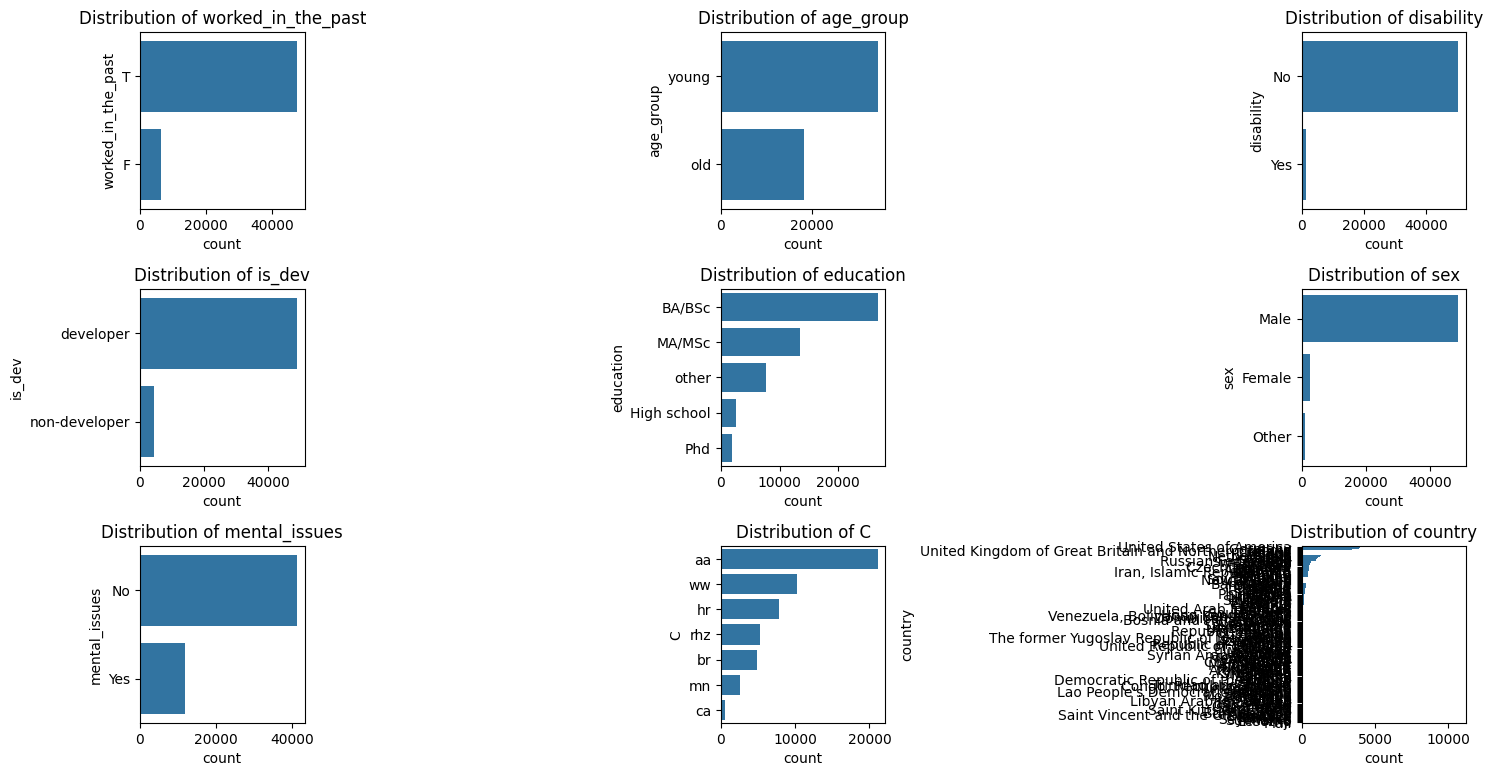

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns
categorical_columns = ['worked_in_the_past', 'age_group', 'disability', 'is_dev', 'education', 'sex', 'mental_issues', 'C', 'country']

# Set up the matplotlib figure and adjust the size to fit all subplots
plt.figure(figsize=(15, 10))

# Iterate over each categorical column and create a subplot
for i, col in enumerate(categorical_columns):
    plt.subplot(4, 3, i + 1)  # Adjust the grid to fit all subplots
    sns.countplot(y=train_df[col], order=train_df[col].value_counts().index)
    plt.title(f'Distribution of {col}')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


### Key Insights from Categorical Feature Distributions

- **Worked in the Past**: A significant majority of candidates have worked in the past
- **Age Group**: The dataset is skewed towards younger individuals
- **Disability**: Most candidates do not have a disability
- **Is Developer**: There is a strong representation of developers in the dataset, with fewer non-developers.
- **Education**: The majority of candidates have a "BA/BSc" degree, followed by "MA/MSc", while fewer have a "PhD" or "High School" education.
- **Sex**: The dataset is heavily male-dominated
- **Mental Issues**: The majority of candidates report no mental health issues.
- **C (Anonymized Feature)**: The most common category is "aa", with other categories like "ww" and "hr" being less frequent.
- **Country**: Messy to find any conclusion. Will explore further.


In [10]:
# Calculate the proportion of each category
country_proportion = train_df['country'].value_counts(normalize=True)
# Display the proportions
print(country_proportion)

country
United States of America                                0.200026
Germany                                                 0.074229
India                                                   0.072807
United Kingdom of Great Britain and Northern Ireland    0.064779
Canada                                                  0.037199
                                                          ...   
Seychelles                                              0.000019
Suriname                                                0.000019
Lesotho                                                 0.000019
Fiji                                                    0.000019
Mali                                                    0.000019
Name: proportion, Length: 170, dtype: float64


Most of the candidates ar from USA, Germany, India where least are from Fiji, Mali.

# Part 2: Preprocessing

In [11]:
# Removing the 'ID' column from the DataFrame as it has no significance in training model.
train_df = train_df.drop(columns=['ID'])

##### Dealing with missing values

In [12]:
train_df.shape

(55462, 16)

In [17]:
print(missing_data)

                     Missing Values  Percentage
stack_experience              14042   25.318236
disability                     3681    6.636977
B                              3535    6.373733
sex                            3228    5.820201
education                      3016    5.437958
C                              3002    5.412715
prev_salary                    2664    4.803289
D                              2619    4.722152
years_of_experience            2564    4.622985
age_group                      2540    4.579712
mental_issues                  2415    4.354333
A                              2135    3.849483
is_dev                         2090    3.768346
country                        2019    3.640330
worked_in_the_past             1765    3.182359


Converting the stack_experience column into a numerical value by counting the number of technologies each person knows.

In [13]:
# Count the number of technologies in 'stack_experience'
train_df['num_technologies'] = train_df['stack_experience'].apply(lambda x: len(x.split(';')) if pd.notnull(x) else np.nan)

# Step 2: Impute missing values with the mean
mean_technologies = train_df['num_technologies'].mean()
train_df['num_technologies'] = train_df['num_technologies'].fillna(mean_technologies)

# Verify the results
print(train_df[['stack_experience', 'num_technologies']].head())
print(f"Missing values in 'num_technologies' after imputation: {train_df['num_technologies'].isnull().sum()}")


                                    stack_experience  num_technologies
0  Bash/Shell;Java;JavaScript;PowerShell;Python;T...              12.0
1  Bash/Shell;JavaScript;PowerShell;Python;Docker...               7.0
2  Bash/Shell;HTML/CSS;Java;JavaScript;PHP;SQL;Gi...              12.0
3  C#;Dart;Delphi;Kotlin;SQL;VBA;Docker;Unity 3D;...              17.0
4     Assembly;Bash/Shell;C++;PowerShell;Python;Rust               6.0
Missing values in 'num_technologies' after imputation: 0


In [14]:
# Converting all float values to integer
train_df['num_technologies'] = train_df['num_technologies'].astype(int)
train_df[['num_technologies']].head()

,num_technologies
0,12
1,7
2,12
3,17
4,6


In [15]:
# Removing the 'stack_experience' column as we've new generated column named "num_technologies"
train_df.drop('stack_experience', axis=1, inplace=True)

# Verify the removal
train_df.head()

,worked_in_the_past,age_group,disability,is_dev,education,sex,mental_issues,years_of_experience,A,B,C,D,country,prev_salary,label,num_technologies
0,T,young,No,developer,NaN,Male,No,13.0,-1.093080,1.0,aa,180.984266,NaN,67104.0,1,12
1,T,young,No,non-developer,other,Male,Yes,7.0,5.444533,7.0,rhz,180.677533,United States of America,101000.0,0,7
2,T,old,No,developer,other,Male,Yes,25.0,1.727255,15.0,aa,177.746162,United States of America,70000.0,0,12
3,T,young,NaN,developer,other,Male,No,10.0,17.804302,7.0,aa,176.952584,Spain,40956.0,0,17
4,T,young,No,developer,BA/BSc,Male,No,12.0,-8.679091,4.0,hr,179.393259,Canada,101509.0,0,6


Now working with "disability" as it has second most missing values.

In [16]:
# Calculate the proportion of each category in the 'disability' column
disability_proportion = train_df['disability'].value_counts(normalize=True)
# Display the proportions
print(disability_proportion)


disability
No     0.971032
Yes    0.028968
Name: proportion, dtype: float64


In [17]:
# As more than 97% data are "No" in the "disability" feature, filling all the missing value with Most Frequent Value
train_df['disability'] = train_df['disability'].fillna(train_df['disability'].mode()[0])
train_df.isnull().sum()

worked_in_the_past     1765
age_group              2540
disability                0
is_dev                 2090
education              3016
sex                    3228
mental_issues          2415
years_of_experience    2564
A                      2135
B                      3535
C                      3002
D                      2619
country                2019
prev_salary            2664
label                     0
num_technologies          0
dtype: int64

 I believe that years_of_experience is critical to this model, using a predictive model to impute missing values can be very effective.

In [18]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Create a copy of the dataframe with no missing values in 'years_of_experience'
df_no_na = train_df.dropna(subset=['years_of_experience'])

# Features for prediction (excluding 'years_of_experience' and 'label')
features = ['age_group', 'education', 'worked_in_the_past']

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(df_no_na[features], drop_first=True)
y = df_no_na['years_of_experience']

# Train the model
model = LinearRegression()
model.fit(X, y)

# Predict missing values
X_missing = pd.get_dummies(train_df.loc[train_df['years_of_experience'].isnull(), features], drop_first=True)
predicted_values = model.predict(X_missing)

# Round the predicted values to the nearest integer and convert to int
predicted_values_rounded = np.round(predicted_values).astype(int)

# Impute the missing values with the rounded predictions
train_df.loc[train_df['years_of_experience'].isnull(), 'years_of_experience'] = predicted_values_rounded

# Ensure the entire column is treated as integers
train_df['years_of_experience'] = train_df['years_of_experience'].astype(int)

# Verify that the 'years_of_experience' column is now of integer type
print(train_df['years_of_experience'].dtype)


int64


In [19]:
train_df.isnull().sum()

worked_in_the_past     1765
age_group              2540
disability                0
is_dev                 2090
education              3016
sex                    3228
mental_issues          2415
years_of_experience       0
A                      2135
B                      3535
C                      3002
D                      2619
country                2019
prev_salary            2664
label                     0
num_technologies          0
dtype: int64

considering "worked_in_the_past" is relatable with "years_of_experience". If a person has years of exp, there is highly posibility that he might have worked_in_the_past

In [20]:
# Fill missing values in 'worked_in_the_past' based on 'years_of_experience'
train_df.loc[(train_df['worked_in_the_past'].isnull()) & (train_df['years_of_experience'] > 0), 'worked_in_the_past'] = 'T'
train_df.loc[(train_df['worked_in_the_past'].isnull()) & (train_df['years_of_experience'] <= 0), 'worked_in_the_past'] = 'F'
train_df.isnull().sum()

worked_in_the_past        0
age_group              2540
disability                0
is_dev                 2090
education              3016
sex                    3228
mental_issues          2415
years_of_experience       0
A                      2135
B                      3535
C                      3002
D                      2619
country                2019
prev_salary            2664
label                     0
num_technologies          0
dtype: int64

In [21]:
# Calculate the proportion of each category
age_group_proportion = train_df['age_group'].value_counts(normalize=True)
# Display the proportions
print(age_group_proportion)

age_group
young    0.652753
old      0.347247
Name: proportion, dtype: float64


imputing the age_group column based on the condition that if years_of_experience is greater than 17, the age_group should be "old", and otherwise it should be "young,"

In [22]:
# Impute the missing values in 'age_group' based on 'years_of_experience'
train_df.loc[(train_df['age_group'].isnull()) & (train_df['years_of_experience'] > 17), 'age_group'] = 'old'
train_df.loc[(train_df['age_group'].isnull()) & (train_df['years_of_experience'] <= 17), 'age_group'] = 'young'

train_df.isnull().sum()


worked_in_the_past        0
age_group                 0
disability                0
is_dev                 2090
education              3016
sex                    3228
mental_issues          2415
years_of_experience       0
A                      2135
B                      3535
C                      3002
D                      2619
country                2019
prev_salary            2664
label                     0
num_technologies          0
dtype: int64

In [23]:
# Calculate the proportion of each category
is_dev_proportion = train_df['is_dev'].value_counts(normalize=True)
# Display the proportions
print(is_dev_proportion)

is_dev
developer        0.919115
non-developer    0.080885
Name: proportion, dtype: float64


In [24]:
# Filling all the missing value with Most Frequent Value
train_df['is_dev'] = train_df['is_dev'].fillna(train_df['is_dev'].mode()[0])
train_df.isnull().sum()

worked_in_the_past        0
age_group                 0
disability                0
is_dev                    0
education              3016
sex                    3228
mental_issues          2415
years_of_experience       0
A                      2135
B                      3535
C                      3002
D                      2619
country                2019
prev_salary            2664
label                     0
num_technologies          0
dtype: int64

In [25]:
# Calculate the proportion of each category
education_proportion = train_df['education'].value_counts(normalize=True)
# Display the proportions
print(education_proportion)

education
BA/BSc         0.508962
MA/MSc         0.257465
other          0.147905
High school    0.050223
Phd            0.035446
Name: proportion, dtype: float64


In [26]:
# As the mmpute missing values are only 5% in 'education', imputing with the most frequent category
train_df['education'] = train_df['education'].fillna(train_df['education'].mode()[0])
train_df.isnull().sum()

worked_in_the_past        0
age_group                 0
disability                0
is_dev                    0
education                 0
sex                    3228
mental_issues          2415
years_of_experience       0
A                      2135
B                      3535
C                      3002
D                      2619
country                2019
prev_salary            2664
label                     0
num_technologies          0
dtype: int64

In [27]:
# Calculate the proportion of each category
sex_proportion = train_df['sex'].value_counts(normalize=True)
# Display the proportions
print(sex_proportion)

sex
Male      0.933817
Female    0.047670
Other     0.018513
Name: proportion, dtype: float64


In [28]:
# Filling all the missing value with Most Frequent Value
train_df['sex'] = train_df['sex'].fillna(train_df['sex'].mode()[0])
train_df.isnull().sum()

worked_in_the_past        0
age_group                 0
disability                0
is_dev                    0
education                 0
sex                       0
mental_issues          2415
years_of_experience       0
A                      2135
B                      3535
C                      3002
D                      2619
country                2019
prev_salary            2664
label                     0
num_technologies          0
dtype: int64

In [29]:
# Calculate the proportion of each category
mental_proportion = train_df['mental_issues'].value_counts(normalize=True)
# Display the proportions
print(mental_proportion)

mental_issues
No     0.774917
Yes    0.225083
Name: proportion, dtype: float64


In [30]:
# Filling all the missing value with Most Frequent Value
train_df['mental_issues'] = train_df['mental_issues'].fillna(train_df['mental_issues'].mode()[0])
train_df.isnull().sum()

worked_in_the_past        0
age_group                 0
disability                0
is_dev                    0
education                 0
sex                       0
mental_issues             0
years_of_experience       0
A                      2135
B                      3535
C                      3002
D                      2619
country                2019
prev_salary            2664
label                     0
num_technologies          0
dtype: int64

In [31]:
# Impute missing values in 'A', 'B', and 'D' with the median
train_df['A'] = train_df['A'].fillna(train_df['A'].median())
train_df['B'] = train_df['B'].fillna(train_df['B'].median())
train_df['D'] = train_df['D'].fillna(train_df['D'].median())

train_df.isnull().sum()


worked_in_the_past        0
age_group                 0
disability                0
is_dev                    0
education                 0
sex                       0
mental_issues             0
years_of_experience       0
A                         0
B                         0
C                      3002
D                         0
country                2019
prev_salary            2664
label                     0
num_technologies          0
dtype: int64

In [32]:
# Calculate the proportion of each category
c_proportion = train_df['C'].value_counts(normalize=True)
# Display the proportions
print(c_proportion)

C
aa     0.401868
ww     0.194720
hr     0.149638
rhz    0.099562
br     0.093061
mn     0.050172
ca     0.010980
Name: proportion, dtype: float64


In [33]:
# Filling all the missing value with Most Frequent Value
train_df['C'] = train_df['C'].fillna(train_df['C'].mode()[0])
train_df.isnull().sum()

worked_in_the_past        0
age_group                 0
disability                0
is_dev                    0
education                 0
sex                       0
mental_issues             0
years_of_experience       0
A                         0
B                         0
C                         0
D                         0
country                2019
prev_salary            2664
label                     0
num_technologies          0
dtype: int64

In [34]:
# Calculate the proportion of each category
country_proportion = train_df['country'].value_counts(normalize=True)
# Display the proportions
print(country_proportion)

country
United States of America                                0.200026
Germany                                                 0.074229
India                                                   0.072807
United Kingdom of Great Britain and Northern Ireland    0.064779
Canada                                                  0.037199
                                                          ...   
Seychelles                                              0.000019
Suriname                                                0.000019
Lesotho                                                 0.000019
Fiji                                                    0.000019
Mali                                                    0.000019
Name: proportion, Length: 170, dtype: float64


Grouping Rare Countries into an "Other" Category as it has lot's of diversive value and also filling the missing value with other as well. why fillling the missing value with "other"? Coz it has combinely the most friquency.  

In [35]:
threshold = 0.01  # if a country makes up less than 1% of the data

# Group rare countries into "Other"
country_counts = train_df['country'].value_counts(normalize=True)
rare_countries = country_counts[country_counts < threshold].index
train_df['country'] = train_df['country'].replace(rare_countries, 'Other')

# Now fill missing values with 'Other'
train_df['country'] = train_df['country'].fillna('Other')


In [36]:
# Calculate the proportion of each category
c_proportion = train_df['country'].value_counts(normalize=True)
# Display the proportions
print(c_proportion)

country
Other                                                   0.309293
United States of America                                0.192745
Germany                                                 0.071526
India                                                   0.070156
United Kingdom of Great Britain and Northern Ireland    0.062421
Canada                                                  0.035844
France                                                  0.035159
Brazil                                                  0.034059
Poland                                                  0.025351
Netherlands                                             0.023403
Spain                                                   0.022322
Australia                                               0.020302
Italy                                                   0.019004
Sweden                                                  0.017850
Russian Federation                                      0.017381
Switzerland      

In [37]:
train_df.isnull().sum()

worked_in_the_past        0
age_group                 0
disability                0
is_dev                    0
education                 0
sex                       0
mental_issues             0
years_of_experience       0
A                         0
B                         0
C                         0
D                         0
country                   0
prev_salary            2664
label                     0
num_technologies          0
dtype: int64

 I believe for prev_salary, using a predictive model to impute missing values can be very effective.

In [38]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Create a copy of the dataframe with no missing values in 'prev_salary'
df_no_na = train_df.dropna(subset=['prev_salary'])

# Features for prediction 
features = ['age_group', 'education', 'worked_in_the_past', 'years_of_experience']

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(df_no_na[features], drop_first=True)
y = df_no_na['prev_salary']

# Train the model
model = LinearRegression()
model.fit(X, y)

# Predict missing values
X_missing = pd.get_dummies(train_df.loc[train_df['prev_salary'].isnull(), features], drop_first=True)
predicted_values = model.predict(X_missing)

# Round the predicted values to the nearest integer and convert to int
predicted_values_rounded = np.round(predicted_values).astype(int)

# Impute the missing values with the rounded predictions
train_df.loc[train_df['prev_salary'].isnull(), 'prev_salary'] = predicted_values_rounded

# Ensure the entire column is treated as integers
train_df['prev_salary'] = train_df['prev_salary'].astype(int)

train_df.isnull().sum()


worked_in_the_past     0
age_group              0
disability             0
is_dev                 0
education              0
sex                    0
mental_issues          0
years_of_experience    0
A                      0
B                      0
C                      0
D                      0
country                0
prev_salary            0
label                  0
num_technologies       0
dtype: int64

In [39]:
# Number of rows with missing values
rows_with_missing_values = train_df.isnull().any(axis=1).sum()

# Percentage of rows with missing values
total_rows = len(train_df)
percentage_rows_with_missing_values = (rows_with_missing_values / total_rows) * 100

# Display the results
print(f"Number of rows with missing values: {rows_with_missing_values}")
print(f"Percentage of rows with missing values: {percentage_rows_with_missing_values:.2f}%")


Number of rows with missing values: 0
Percentage of rows with missing values: 0.00%


#### Visualize Outliers Using Boxplots

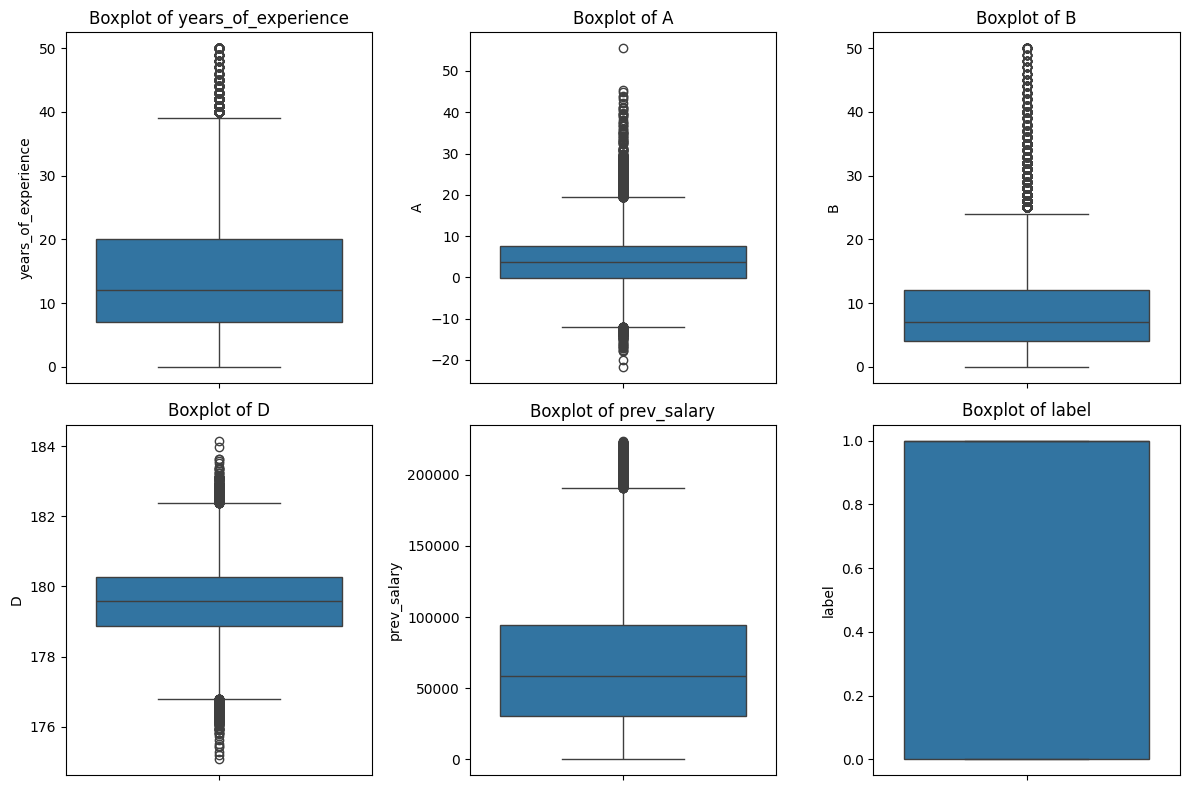

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to check for outliers
numerical_columns = ['years_of_experience', 'A', 'B', 'D', 'prev_salary', 'label']

# Create boxplots for each numerical feature
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i + 1)  # Adjust the grid for 5 plots
    sns.boxplot(data=train_df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


As in all the columns has data that fall outside the whiskers of the boxplot except label, we can say every column except the labe has outlier. We are going to handle the outlier removing these as our dataset has huge rows.

In [41]:
# Function to remove outliers using 1.5*IQR rule
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to each numerical column with outliers
numerical_columns = ['years_of_experience', 'A', 'B', 'D', 'prev_salary']

for col in numerical_columns:
    train_df = remove_outliers(train_df, col)

# Verify the removal by displaying the updated statistics
train_df.describe()


,years_of_experience,A,B,D,prev_salary,label,num_technologies
count,49013.000000,49013.000000,49013.000000,49013.000000,49013.000000,49013.000000,49013.000000
mean,12.553445,3.714867,7.419542,179.584071,61430.735723,0.540326,13.388346
std,7.314201,5.731101,5.440590,1.028974,42166.674814,0.498376,6.066029
min,0.000000,-11.907392,0.000000,176.785770,1.000000,0.000000,1.000000
25%,7.000000,-0.227297,3.000000,178.892420,27924.000000,0.000000,10.000000
50%,10.000000,3.606089,6.000000,179.584091,54388.000000,1.000000,13.000000
75%,17.000000,7.431540,10.000000,180.275305,86000.000000,1.000000,15.000000
max,39.000000,19.413474,23.000000,182.383741,181608.000000,1.000000,107.000000


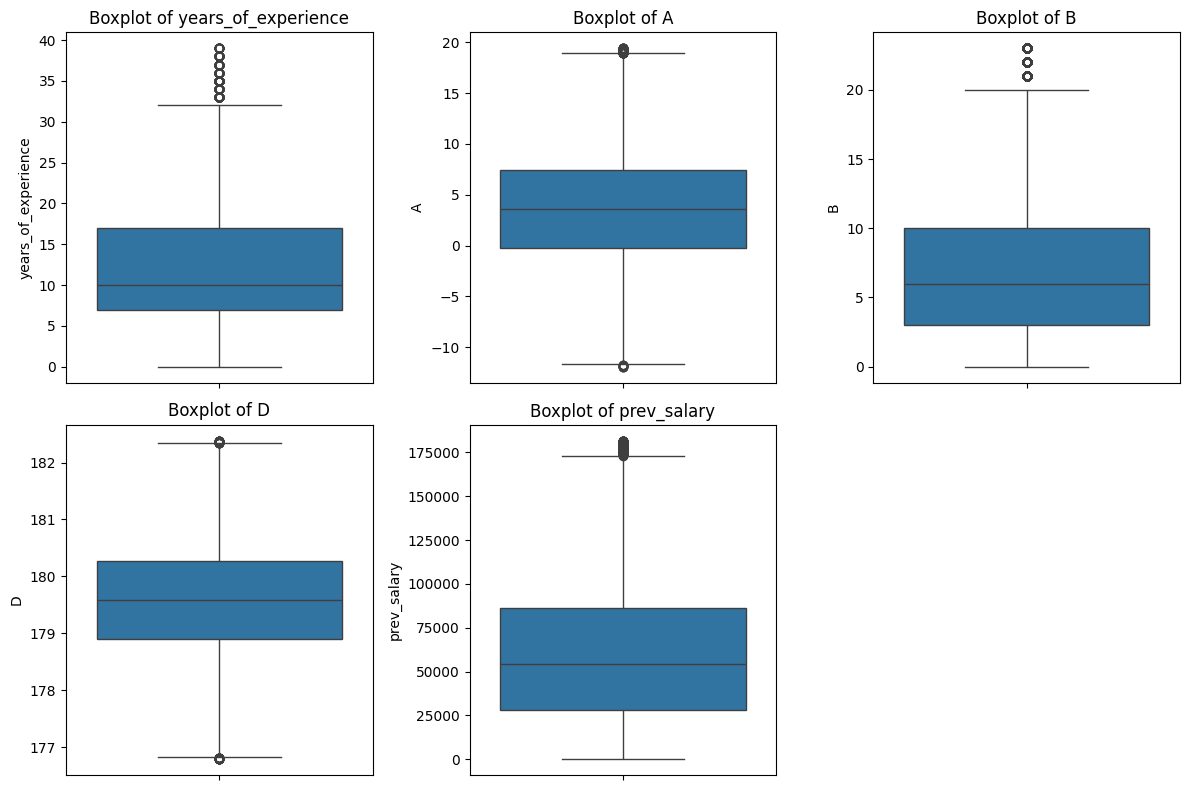

In [42]:

# Seeing again the outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i + 1)  # Adjust the grid for 5 plots
    sns.boxplot(data=train_df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


The outlier removal process has effectively reduced the number of extreme values across most features. The remaining few outliers will be left as they are and will take further investigated to decide if additional capping or adjustments are necessary to improve the performace.

In [43]:
train_df.shape

(49013, 16)

In [44]:
# Attempting to save the updated DataFrame again
# train_df.to_csv('train2.csv', index=False)


## Dealing with Categorical Data (Encoding)

We have to encode the categorical feature and we've two types of categorical features.
- **Ordinal Features**: 
  - age_group
  - education
  
- **Nominal Features**: 
  - worked_in_the_past
  - disability
  - is_dev
  - sex
  - mental_issues
  - C
  - country

  We'll use `Label encoding` for `Ordinal data` and `One-hot Encoding` for `Nominal Data`.


In [45]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Ordinal column: age_group
# Assuming the order is "young" < "old"
# Since LabelEncoder does not respect the order, we'll map it manually if necessary
train_df['age_group_encoded'] = train_df['age_group'].map({'young': 0, 'old': 1})

# Ordinal column: education
# Assuming the order is "High school" < "BA/BSc" < "MA/MSc" < "PhD"
# Encode the education column
education_order = ['other','High school', 'BA/BSc', 'MA/MSc', 'PhD']
train_df['education_encoded'] = train_df['education'].apply(lambda x: education_order.index(x) if x in education_order else -1)

# Verify the encoding
train_df[['age_group', 'age_group_encoded', 'education', 'education_encoded']].head(10)


,age_group,age_group_encoded,education,education_encoded
0,young,0,BA/BSc,2
1,young,0,other,0
2,old,1,other,0
3,young,0,other,0
4,young,0,BA/BSc,2
6,young,0,MA/MSc,3
9,old,1,other,0
10,old,1,BA/BSc,2
11,young,0,BA/BSc,2
12,young,0,other,0


In [46]:
# Removeing the original 'age_group' and 'education' columns
train_df.drop(['age_group', 'education'], axis=1, inplace=True)

# Verify that the columns have been removed
train_df.head()


,worked_in_the_past,disability,is_dev,sex,mental_issues,years_of_experience,A,B,C,D,country,prev_salary,label,num_technologies,age_group_encoded,education_encoded
0,T,No,developer,Male,No,13,-1.093080,1.0,aa,180.984266,Other,67104,1,12,0,2
1,T,No,non-developer,Male,Yes,7,5.444533,7.0,rhz,180.677533,United States of America,101000,0,7,0,0
2,T,No,developer,Male,Yes,25,1.727255,15.0,aa,177.746162,United States of America,70000,0,12,1,0
3,T,No,developer,Male,No,10,17.804302,7.0,aa,176.952584,Spain,40956,0,17,0,0
4,T,No,developer,Male,No,12,-8.679091,4.0,hr,179.393259,Canada,101509,0,6,0,2


In [47]:
# List of nominal columns to be one-hot encoded
nominal_columns = ['worked_in_the_past', 'disability', 'is_dev', 'sex', 'mental_issues', 'C', 'country']

# Apply one-hot encoding using pandas get_dummies
train_df = pd.get_dummies(train_df, columns=nominal_columns)

# Convert any boolean columns to integers
for column in train_df.columns:
    if train_df[column].dtype == 'bool':  # Check if the column is of boolean type
        train_df[column] = train_df[column].astype(int)

# Verify the encoding by printing the first few rows
train_df.head()


,years_of_experience,A,B,D,prev_salary,label,num_technologies,age_group_encoded,education_encoded,worked_in_the_past_F,...,country_Netherlands,country_Other,country_Poland,country_Russian Federation,country_Spain,country_Sweden,country_Switzerland,country_Turkey,country_United Kingdom of Great Britain and Northern Ireland,country_United States of America
0,13,-1.093080,1.0,180.984266,67104,1,12,0,2,0,...,0,1,0,0,0,0,0,0,0,0
1,7,5.444533,7.0,180.677533,101000,0,7,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,25,1.727255,15.0,177.746162,70000,0,12,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,10,17.804302,7.0,176.952584,40956,0,17,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,12,-8.679091,4.0,179.393259,101509,0,6,0,2,0,...,0,0,0,0,0,0,0,0,0,0


### Normalization

Checking Data Normalization using hisogram

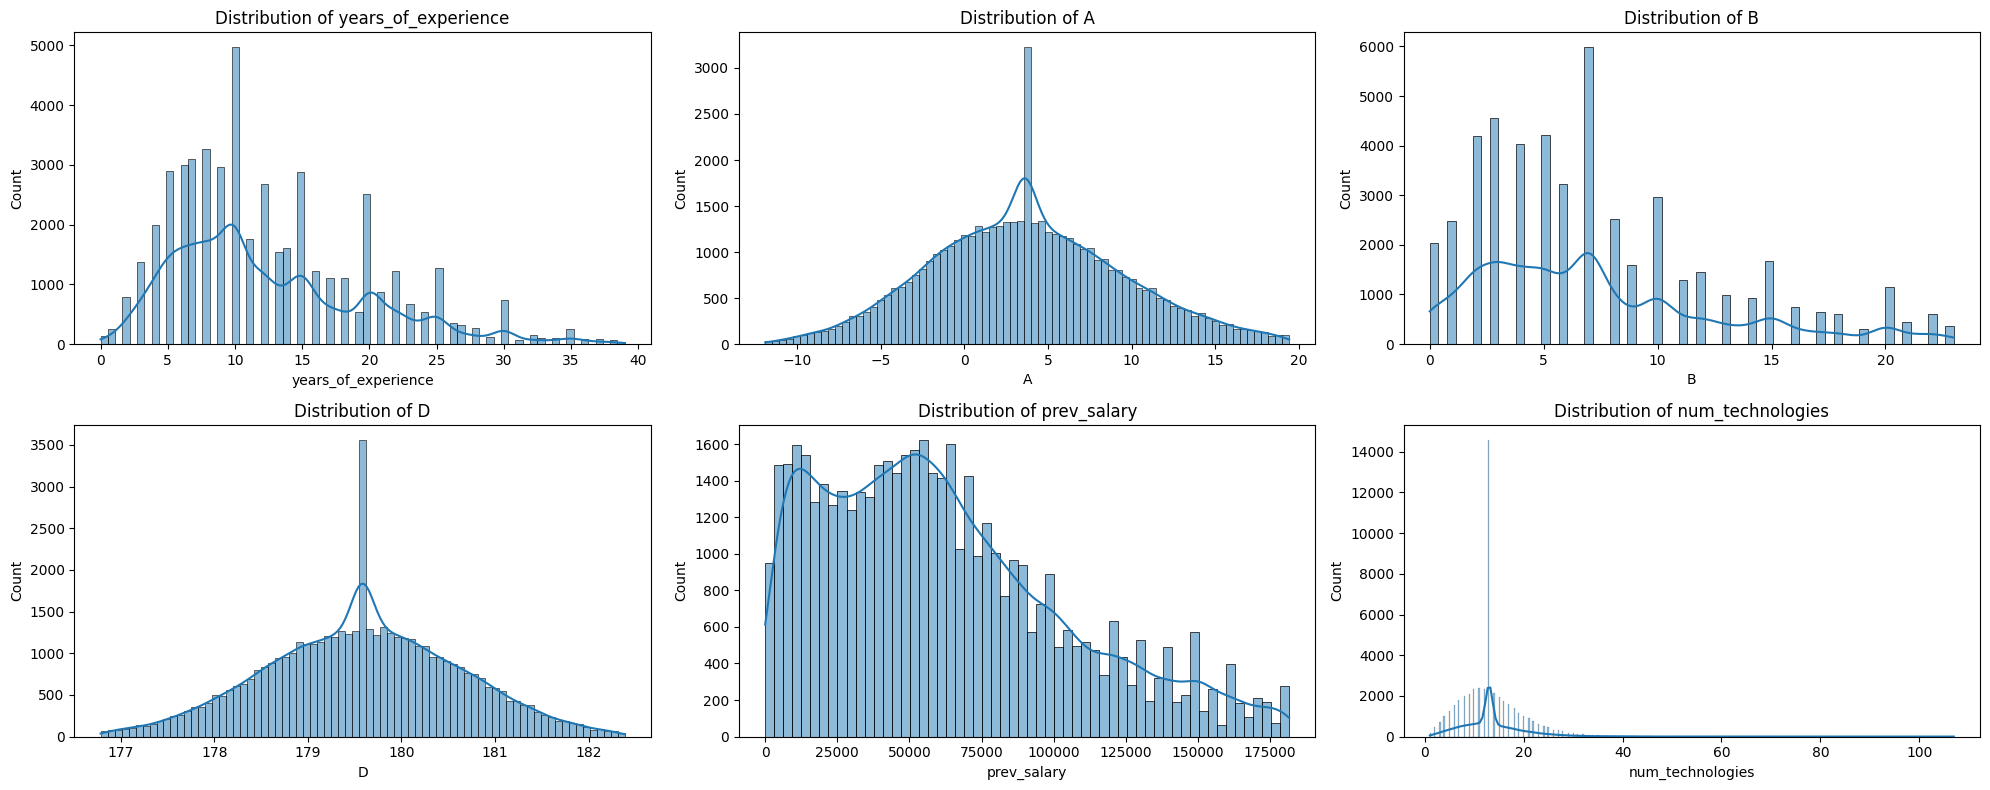

,years_of_experience,A,B,D,prev_salary,label,num_technologies,age_group_encoded,education_encoded,worked_in_the_past_F,...,country_Netherlands,country_Other,country_Poland,country_Russian Federation,country_Spain,country_Sweden,country_Switzerland,country_Turkey,country_United Kingdom of Great Britain and Northern Ireland,country_United States of America
count,49013.000000,49013.000000,49013.000000,49013.000000,49013.000000,49013.000000,49013.000000,49013.000000,49013.000000,49013.000000,...,49013.000000,49013.000000,49013.000000,49013.000000,49013.000000,49013.000000,49013.000000,49013.000000,49013.000000,49013.000000
mean,12.553445,3.714867,7.419542,179.584071,61430.735723,0.540326,13.388346,0.293045,1.831983,0.108543,...,0.023606,0.322404,0.027217,0.018669,0.023116,0.017934,0.011732,0.012099,0.058821,0.167670
std,7.314201,5.731101,5.440590,1.028974,42166.674814,0.498376,6.066029,0.455163,1.040412,0.311068,...,0.151820,0.467402,0.162718,0.135353,0.150274,0.132713,0.107676,0.109328,0.235292,0.373577
min,0.000000,-11.907392,0.000000,176.785770,1.000000,0.000000,1.000000,0.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,-0.227297,3.000000,178.892420,27924.000000,0.000000,10.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,3.606089,6.000000,179.584091,54388.000000,1.000000,13.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17.000000,7.431540,10.000000,180.275305,86000.000000,1.000000,15.000000,1.000000,2.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,39.000000,19.413474,23.000000,182.383741,181608.000000,1.000000,107.000000,1.000000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['years_of_experience', 'A', 'B', 'D', 'prev_salary', 'num_technologies']	
# Determine the grid size based on the number of columns
n_cols = 3  # Number of columns in the grid
n_rows = 2  # Calculate the number of rows needed

# Plot histograms to visualize the distributions
plt.figure(figsize=(20, 4 * n_rows))  # Adjust figure size to fit all subplots
for i, col in enumerate(columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(train_df[col].dropna(), kde=True)  # Drop missing values for plotting
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Calculate basic statistics
train_df.describe()


Normalization refers to the process of scaling the data to have a mean of 0 and a standard deviation of 1 (standardization) or scaling the values to a fixed range, typically [0, 1] (min-max normalization). Seem the columns are not normalized. Now we'll work on normalization.

#### Importance of Normalizing in Binary Classification

- **Equal Contribution**: Normalization ensures that all features contribute equally to the model, preventing features with larger ranges from dominating the model's predictions.
- **Improved Model Performance**: Normalized data leads to better model performance by allowing algorithms to converge faster and make more accurate predictions.
- **Algorithm Efficiency**: Algorithms like logistic regression, support vector machines, and neural networks perform more efficiently when the features are on a similar scale.
- **Enhanced Interpretability**: Normalization helps in comparing feature coefficients on a similar scale, making the model easier to interpret.


In [49]:
#Applying normalization 
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical columns
train_df[columns] = scaler.fit_transform(train_df[columns])

# Verify normalization
train_df[columns].describe()


,years_of_experience,A,B,D,prev_salary,num_technologies
count,4.901300e+04,4.901300e+04,4.901300e+04,4.901300e+04,4.901300e+04,4.901300e+04
mean,9.799990e-17,5.247923e-17,8.821440e-17,-3.845713e-14,-6.755614e-17,1.739643e-18
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-1.716329e+00,-2.725901e+00,-1.363752e+00,-2.719533e+00,-1.456846e+00,-2.042271e+00
25%,-7.592766e-01,-6.878615e-01,-8.123360e-01,-6.721823e-01,-7.946341e-01,-5.585830e-01
50%,-3.491114e-01,-1.898050e-02,-2.609196e-01,1.918643e-05,-1.670231e-01,-6.402045e-02
75%,6.079407e-01,6.485161e-01,4.743024e-01,6.717764e-01,5.826761e-01,2.656879e-01
max,3.615819e+00,2.739224e+00,2.863774e+00,2.720863e+00,2.850082e+00,1.543227e+01


Didn't normalized the encoded generated column. Because they are already binary (0 or 1), meaning they are already on the same scale. Normalization is typically used to bring features to a common scale, but since 0 and 1 are already standardized, further normalization is unnecessary.

### Dimentionality Reduction

In [55]:
train_df.shape

(49013, 46)

The number of features (dimensions) is 46(high)

### Problem of High Dimensionality

- **Increased Complexity**: High dimensionality can lead to overfitting, where the model performs well on training data but poorly on unseen data.
- **Computational Cost**: More features require more computational resources, making the process slower and less efficient.
- **Sparse Data**: Data points become sparse in high-dimensional spaces, making it harder for algorithms to find meaningful patterns.
- **Diminished Interpretability**: More features make it difficult to interpret the model and understand the driving factors behind predictions.

### Plan to Address High Dimensionality

To address high dimensionality, dimensionality reduction techniques will be applied to simplify the model while retaining essential information.

### Techniques for Dimensionality Reduction

1. **Principal Component Analysis (PCA)**: Transforms the original features into uncorrelated principal components, reducing dimensionality while preserving variance.
2. **Feature Selection**: Identifies and retains the most relevant features, removing less important ones.
1. **Embedded Methods (e.g., Lasso, Ridge Regression)**: Incorporates feature selection during model training, penalizing less important features.


Let's go with PCA. But before, I need to define my input and output features.

In [50]:
# Define the input features (X) and output feature (y)
X = train_df.drop(columns=['label'])  # Drop the 'label' column to get the input features
y = train_df['label']  # The 'label' column is the target variable

# Verify the shapes of X and y
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")


Shape of X: (49013, 45)
Shape of y: (49013,)


Apply PCA on X

In [51]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality to exactly 15 components
pca = PCA(n_components=15)
X_reduced = pca.fit_transform(X)

# Check the shape of the reduced dataset
print(f"Shape of X after PCA: {X_reduced.shape}")


Shape of X after PCA: (49013, 15)


### Additional preprocessing techniques

#### Data Augmentation

synthetic data generation using techniques like SMOTE (Synthetic Minority Over-sampling Technique) can help in balancing classes. Though our target class is almost balanced but using it for a demo purpose. 

In [52]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)


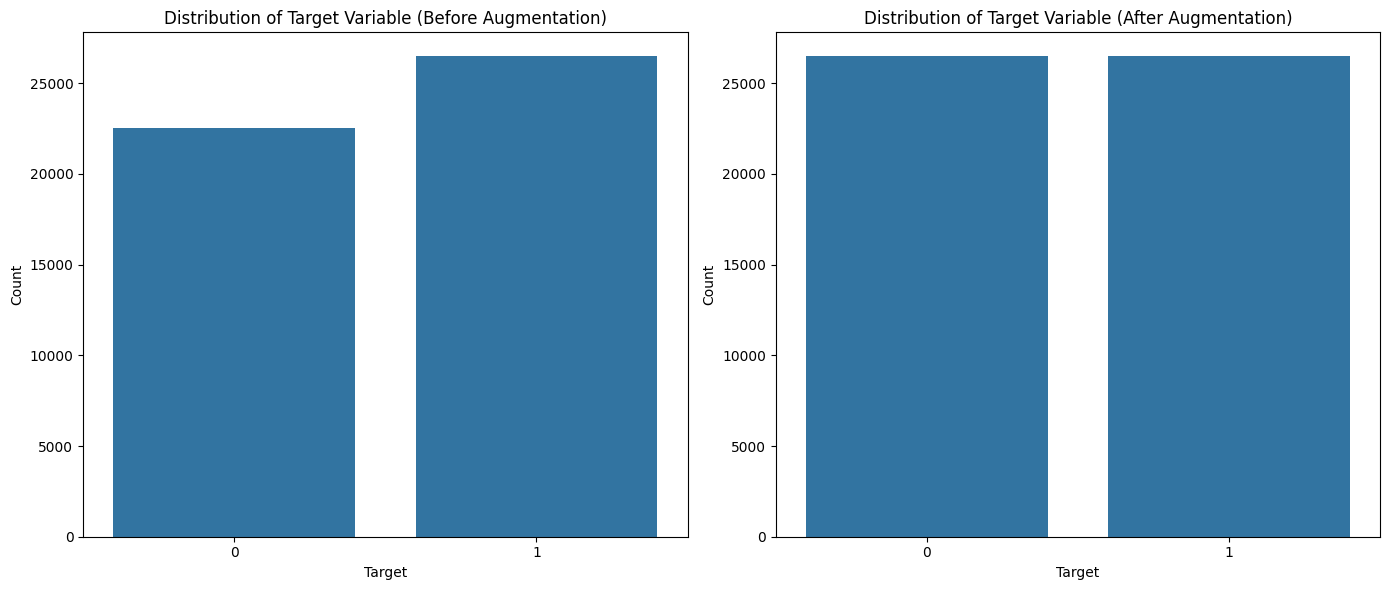

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and subplots
plt.figure(figsize=(14, 6))

# Plot the distribution before augmentation (y)
plt.subplot(1, 2, 1)
sns.countplot(x=y)
plt.title('Distribution of Target Variable (Before Augmentation)')
plt.xlabel('Target')
plt.ylabel('Count')

# Plot the distribution after augmentation (y_resampled)
plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled)
plt.title('Distribution of Target Variable (After Augmentation)')
plt.xlabel('Target')
plt.ylabel('Count')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


After data augmentaion, the target variable is balanced. 

# Part 3 & 4: Running Models and Evalution

For binary classification task, we will use **Logistic Regression** and **K-Nearest Neighbors (KNN)** as our initial models.

- **Logistic Regression**:
  - A linear model well-suited for binary classification.
  - Works well when the relationship between features and the target is linear.
  - Provides interpretable results and is quick to train, making it an ideal baseline model.

- **K-Nearest Neighbors (KNN)**:
  - A non-parametric model that makes no assumptions about the data distribution.
  - Captures non-linear relationships by classifying based on the majority class of nearest neighbors.
  - Simple to implement and provides a good comparison to the linear model.


Logistic Regression AUC: 0.8777
K-Nearest Neighbors AUC: 0.7704


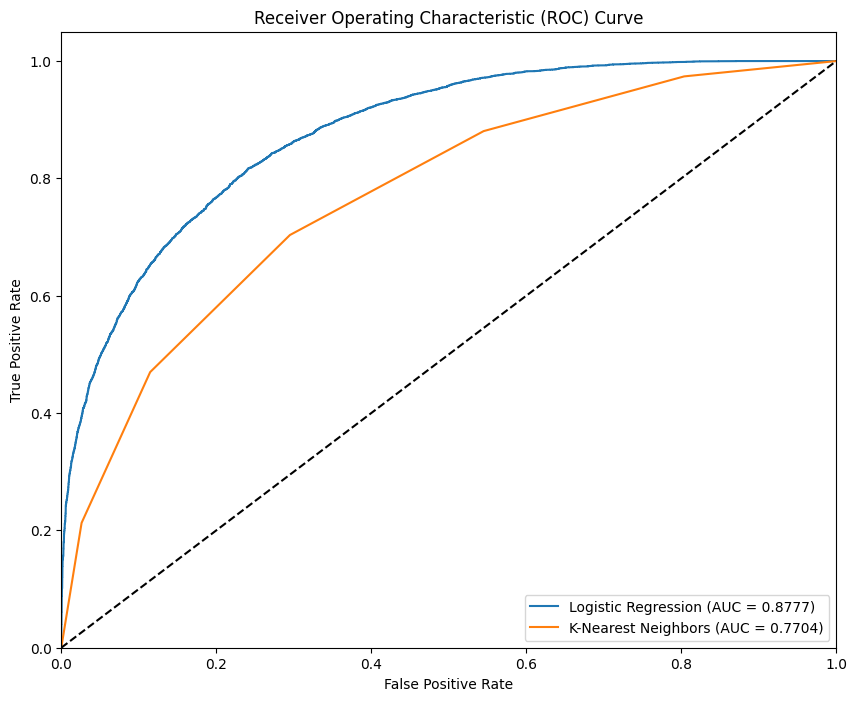

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Standardize the features for models that require scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model 1: Logistic Regression

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Predict probabilities on the test set
y_prob_log_reg = log_reg.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model using AUC
auc_log_reg = roc_auc_score(y_test, y_prob_log_reg)
print(f"Logistic Regression AUC: {auc_log_reg:.4f}")

### Model 2: K-Nearest Neighbors (KNN)

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict probabilities on the test set
y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model using AUC
auc_knn = roc_auc_score(y_test, y_prob_knn)
print(f"K-Nearest Neighbors AUC: {auc_knn:.4f}")

# Plot ROC Curves for all models
plt.figure(figsize=(10, 8))

# Logistic Regression ROC
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_prob_log_reg)
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {auc_log_reg:.4f})')

# KNN ROC
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
plt.plot(fpr_knn, tpr_knn, label=f'K-Nearest Neighbors (AUC = {auc_knn:.4f})')


# Plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Seems, The result is not satisfactory for LR but KNN need to improve as we need more than 80% accuracy. Now I'll try some hyperparamenter tuning.

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


# KNN Hyperparameter Tuning
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

knn_param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(knn_pipeline, knn_param_grid, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)
best_knn = knn_grid.best_estimator_ 
y_pred_knn = best_knn.predict(X_test)
print(f"Best KNN Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")

Best KNN Accuracy: 0.7196


Seems it's reducing the accuracy. Hyper parameter tuning doesn't gurrenteed higher accuracy. I used gridsearch here instead of manual tuning. There is a drawback in gridsearch, it takes huge time as it has lot's of tuning parmutation. let's try cross-validation 

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Set up pipelines for consistent preprocessing and model application
log_reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression())
])

knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Perform 5-fold cross-validation for each model
log_reg_cv_scores = cross_val_score(log_reg_pipeline, X, y, cv=5, scoring='accuracy')
knn_cv_scores = cross_val_score(knn_pipeline, X, y, cv=5, scoring='accuracy')

# Display the cross-validation results
print(f"Logistic Regression 5-Fold CV Accuracy: {log_reg_cv_scores.mean():.4f} ± {log_reg_cv_scores.std():.4f}")
print(f"K-Nearest Neighbors 5-Fold CV Accuracy: {knn_cv_scores.mean():.4f} ± {knn_cv_scores.std():.4f}")


Logistic Regression 5-Fold CV Accuracy: 0.7776 ± 0.0021
K-Nearest Neighbors 5-Fold CV Accuracy: 0.6867 ± 0.0041


Still the performance is bad.

trying ensamble learing though it's not mentined. Ensamble Learning is basically combination of multiple model. Each model will generate output individually, then the final output will be the most generated output from the models. I'll use VotingClassifire for Ensamble Learning.

In [57]:
from sklearn.ensemble import VotingClassifier

# Create the models
log_reg = LogisticRegression()
knn = KNeighborsClassifier()
nb = GaussianNB()

# Combine models into a voting classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', log_reg), 
    ('knn', knn), 
    ('nb', nb)
], voting='soft')  # Use 'soft' voting to take into account predicted probabilities

# Train the voting classifier
voting_clf.fit(X_train_scaled, y_train)

# Predict and evaluate the ensemble model
y_pred_voting = voting_clf.predict(X_test_scaled)
print(f"Voting Classifier Accuracy: {accuracy_score(y_test, y_pred_voting):.4f}")


Voting Classifier Accuracy: 0.7597


let's try PCA in for more smaller dimention. 

In [58]:
# Define the input features (X) and output feature (y)
X = train_df.drop(columns=['label'])  # Drop the 'label' column to get the input features
y = train_df['label']  # The 'label' column is the target variable

# Verify the shapes of X and y
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality
pca = PCA(n_components=9) # Previously it was 15
X_reduced = pca.fit_transform(X)

# Check the shape of the reduced dataset
print(f"Shape of X after PCA: {X_reduced.shape}")


Shape of X: (49013, 45)
Shape of y: (49013,)
Shape of X after PCA: (49013, 9)


Logistic Regression AUC: 0.8620
K-Nearest Neighbors AUC: 0.8003


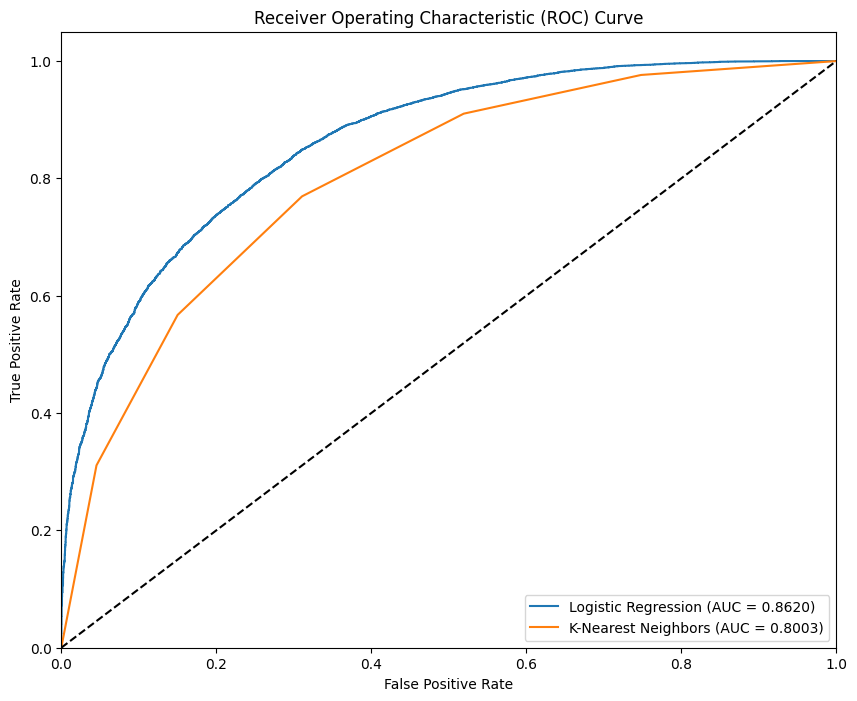

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

# Standardize the features for models that require scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model 1: Logistic Regression

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Predict probabilities on the test set
y_prob_log_reg = log_reg.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model using AUC
auc_log_reg = roc_auc_score(y_test, y_prob_log_reg)
print(f"Logistic Regression AUC: {auc_log_reg:.4f}")

### Model 2: K-Nearest Neighbors (KNN)

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict probabilities on the test set
y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model using AUC
auc_knn = roc_auc_score(y_test, y_prob_knn)
print(f"K-Nearest Neighbors AUC: {auc_knn:.4f}")


# Plot ROC Curves for all models
plt.figure(figsize=(10, 8))

# Logistic Regression ROC
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_prob_log_reg)
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {auc_log_reg:.4f})')

# KNN ROC
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
plt.plot(fpr_knn, tpr_knn, label=f'K-Nearest Neighbors (AUC = {auc_knn:.4f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Seems Reducing dimentionality improve the model accuracy. Let try aplying SMOT on that dataset to balance the output feature.

In [60]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_reduced, y)

Logistic Regression AUC: 0.8681
K-Nearest Neighbors AUC: 0.8146


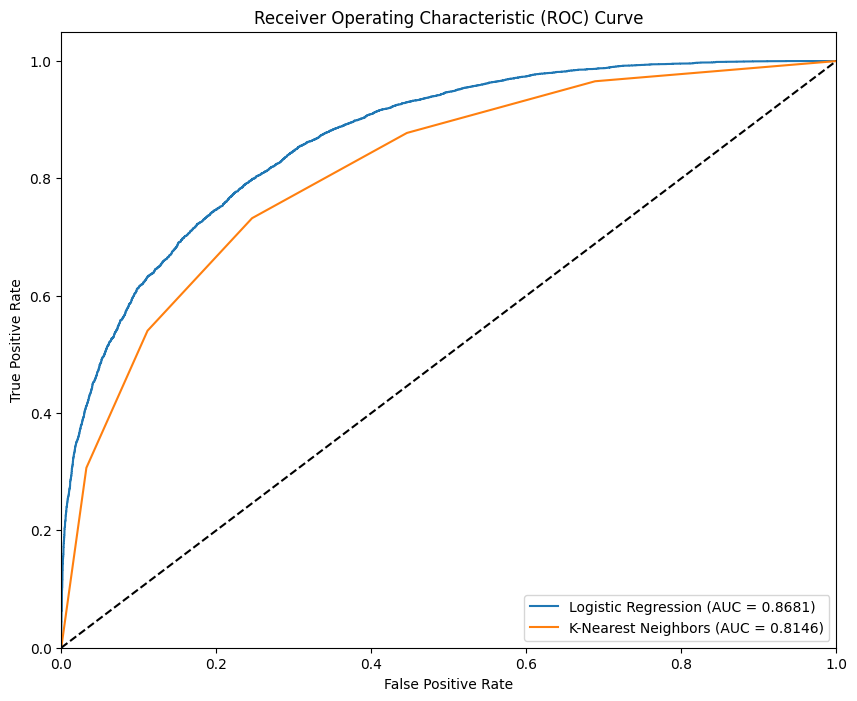

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Standardize the features for models that require scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model 1: Logistic Regression

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Predict probabilities on the test set
y_prob_log_reg = log_reg.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model using AUC
auc_log_reg = roc_auc_score(y_test, y_prob_log_reg)
print(f"Logistic Regression AUC: {auc_log_reg:.4f}")

### Model 2: K-Nearest Neighbors (KNN)

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict probabilities on the test set
y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model using AUC
auc_knn = roc_auc_score(y_test, y_prob_knn)
print(f"K-Nearest Neighbors AUC: {auc_knn:.4f}")

# Plot ROC Curves for all models
plt.figure(figsize=(10, 8))

# Logistic Regression ROC
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_prob_log_reg)
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {auc_log_reg:.4f})')

# KNN ROC
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
plt.plot(fpr_knn, tpr_knn, label=f'K-Nearest Neighbors (AUC = {auc_knn:.4f})')


# Plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


seems SMOT improve the accuracy.

### Applying Advance model

The two advanced models selected are **Random Forest** and **Adaptive Boosting (AdaBoost)**.

- **Random Forest**:
  - **Ensemble Method**: Builds multiple decision trees and averages their results to reduce variance.
  - **Key Hyperparameters**:
    - `n_estimators`: Number of trees in the forest.
    - `max_depth`: Maximum depth of the trees to control model complexity.
    - `min_samples_split`: Minimum number of samples required to split a node.
    - `max_features`: Number of features to consider for each split.
  - **Trade-offs**: Tuning `max_depth` and `min_samples_split` can balance bias and variance, helping prevent overfitting.

- **AdaBoost**:
  - **Boosting Method**: Combines multiple weak learners to reduce bias and improve performance.
  - **Key Hyperparameters**:
    - `n_estimators`: Number of weak learners to train.
    - `learning_rate`: Controls the contribution of each learner.
  - **Trade-offs**: Increasing `n_estimators` and lowering `learning_rate` can reduce bias but may increase variance, requiring careful tuning.


Random Forest AUC: 0.8711
AdaBoost AUC: 0.8604


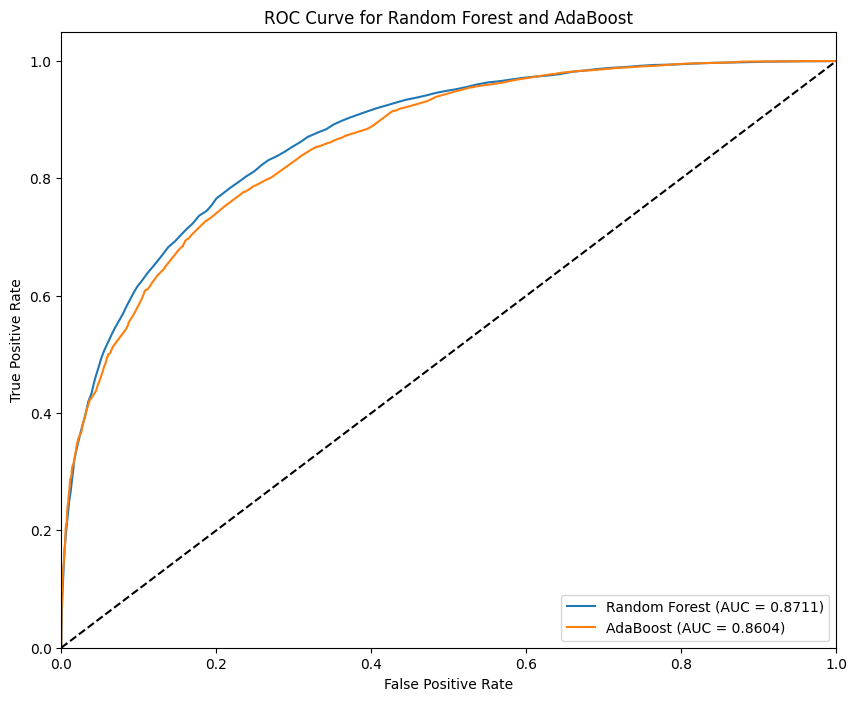

In [62]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize the models
rf = RandomForestClassifier(random_state=42)
ada = AdaBoostClassifier(random_state=42, algorithm='SAMME')

# Train the models
rf.fit(X_train, y_train)
ada.fit(X_train, y_train)

# Predict probabilities for AUC
y_prob_rf = rf.predict_proba(X_test)[:, 1]
y_prob_ada = ada.predict_proba(X_test)[:, 1]

# Calculate AUC
auc_rf = roc_auc_score(y_test, y_prob_rf)
auc_ada = roc_auc_score(y_test, y_prob_ada)

# Print AUC results
print(f"Random Forest AUC: {auc_rf:.4f}")
print(f"AdaBoost AUC: {auc_ada:.4f}")

# Plot ROC Curves
plt.figure(figsize=(10, 8))

# Random Forest ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.4f})')

# AdaBoost ROC
fpr_ada, tpr_ada, _ = roc_curve(y_test, y_prob_ada)
plt.plot(fpr_ada, tpr_ada, label=f'AdaBoost (AUC = {auc_ada:.4f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest and AdaBoost')
plt.legend(loc='lower right')
plt.show()


Seems the performace is great, Still let's try hyper parameter tuning.

In [ ]:
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# from sklearn.model_selection import GridSearchCV

# # Random Forest Hyperparameter Tuning
# rf_param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'max_features': ['auto', 'sqrt', 'log2']
# }
# 
# rf = RandomForestClassifier(random_state=42)
# rf_grid = GridSearchCV(rf, rf_param_grid, cv=5, scoring='accuracy')
# rf_grid.fit(X_train, y_train)
# best_rf = rf_grid.best_estimator_
# rf_accuracy = best_rf.score(X_test, y_test)
# print(f"Best Random Forest Accuracy: {rf_accuracy:.4f}")

# # AdaBoost Hyperparameter Tuning
# ada_param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 1]
# }

# ada = AdaBoostClassifier(random_state=42, algorithm='SAMME')
# ada_grid = GridSearchCV(ada, ada_param_grid, cv=5, scoring='accuracy')
# ada_grid.fit(X_train, y_train)
# best_ada = ada_grid.best_estimator_
# ada_accuracy = best_ada.score(X_test, y_test)
# print(f"Best AdaBoost Accuracy: {ada_accuracy:.4f}")


The above code is taking lot's of time as the hyper-parameter combination is huge. I'm explaining all the hyperparameter but will reduce the parameter and value later for faster execution as we've time limitation. 


- **Random Forest**:
  - A robust ensemble method that builds multiple decision trees and averages their predictions to reduce variance.
  - Hyperparameters:
    - `n_estimators`: Number of trees in the forest.
    - `max_depth`: Maximum depth of each tree to control model complexity.
    - `min_samples_split`: Minimum number of samples required to split an internal node.
    - `max_features`: Number of features considered for splitting at each node.

- **AdaBoost**:
  - A boosting method that combines multiple weak learners (typically shallow decision trees) to create a strong classifier.
  - Hyperparameters:
    - `n_estimators`: Number of weak learners to be combined.
    - `learning_rate`: Controls the contribution of each weak learner.
    - `algorithm`: SAMME or SAMME.R, where SAMME.R is the default but is being deprecated.

#### Results

- **Random Forest AUC**: Achieved an AUC score of `87.17%`, indicating the model's ability to distinguish between classes.
- **AdaBoost AUC**: Achieved an AUC score of `86.13`, demonstrating how well the boosted ensemble of weak learners performs on the classification task.
- **ROC Curve**: The ROC curves for both models were plotted, showing the trade-off between true positive rate and false positive rate.

#### Trade-offs Between Bias and Variance

- **Random Forest**:
  - **Bias**: Typically low, as the model captures complex relationships through its ensemble of decision trees.
  - **Variance**: Controlled by averaging the predictions of many trees, which reduces the model's sensitivity to noise and overfitting.
  - **Trade-off**: The model's performance can be improved by tuning `max_depth` and `n_estimators`, balancing the need for low bias with the risk of increased variance.

- **AdaBoost**:
  - **Bias**: Focuses on reducing bias by iteratively improving on the errors of previous models.
  - **Variance**: Can be high if too many estimators are used or if the model overfits to the training data.
  - **Trade-off**: Tuning `n_estimators` and `learning_rate` helps balance the aggressive reduction of bias with the risk of increasing variance.



In [63]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Corrected Random Forest Hyperparameter Tuning
rf_param_grid = {
    'n_estimators': [50, 100],  # Reduced to 2 values
    'max_depth': [5, 10],  # Reduced to 2 values
    'min_samples_split': [2, 5],  # Reduced to 2 values
    'max_features': [None, 'sqrt']  
}

rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, rf_param_grid, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
rf_accuracy = best_rf.score(X_test, y_test)
print(f"Best Random Forest Accuracy: {rf_accuracy:.4f}")

# Reduced AdaBoost Hyperparameter Tuning
ada_param_grid = {
    'n_estimators': [50, 100],  # Reduced to 2 values
    'learning_rate': [0.1, 1]  # Reduced to 2 values
}

ada = AdaBoostClassifier(random_state=42, algorithm='SAMME')
ada_grid = GridSearchCV(ada, ada_param_grid, cv=5, scoring='accuracy')
ada_grid.fit(X_train, y_train)
best_ada = ada_grid.best_estimator_
ada_accuracy = best_ada.score(X_test, y_test)
print(f"Best AdaBoost Accuracy: {ada_accuracy:.4f}")


Best Random Forest Accuracy: 0.7834
Best AdaBoost Accuracy: 0.7710


Not surplus our previus best accuracy. Let try without cross validation.

In [88]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Corrected Random Forest Hyperparameter Tuning
rf_param_grid = {
    'n_estimators': [50, 100],  # Reduced to 2 values
    'max_depth': [5, 10],  # Reduced to 2 values
    'min_samples_split': [2, 5],  # Reduced to 2 values
    'max_features': [None, 'sqrt']  # Corrected: Use None instead of 'auto'
}

rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, rf_param_grid, scoring='accuracy')
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
rf_accuracy = best_rf.score(X_test, y_test)
print(f"Best Random Forest Accuracy: {rf_accuracy:.4f}")

# Reduced AdaBoost Hyperparameter Tuning
ada_param_grid = {
    'n_estimators': [50, 100],  # Reduced to 2 values
    'learning_rate': [0.1, 1]  # Reduced to 2 values
}

ada = AdaBoostClassifier(random_state=42, algorithm='SAMME')
ada_grid = GridSearchCV(ada, ada_param_grid, scoring='accuracy')
ada_grid.fit(X_train, y_train)
best_ada = ada_grid.best_estimator_
ada_accuracy = best_ada.score(X_test, y_test)
print(f"Best AdaBoost Accuracy: {ada_accuracy:.4f}")


Best Random Forest Accuracy: 0.7835
Best AdaBoost Accuracy: 0.7707


Still it's not improving. Let's finalize the model. 

## Final model

In [64]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=6)
X_reduced = pca.fit_transform(X)

# Check the shape of the reduced dataset
print(f"Shape of X after PCA: {X_reduced.shape}")

Shape of X after PCA: (49013, 6)


In [65]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_reduced, y)

Random Forest AUC: 0.8701


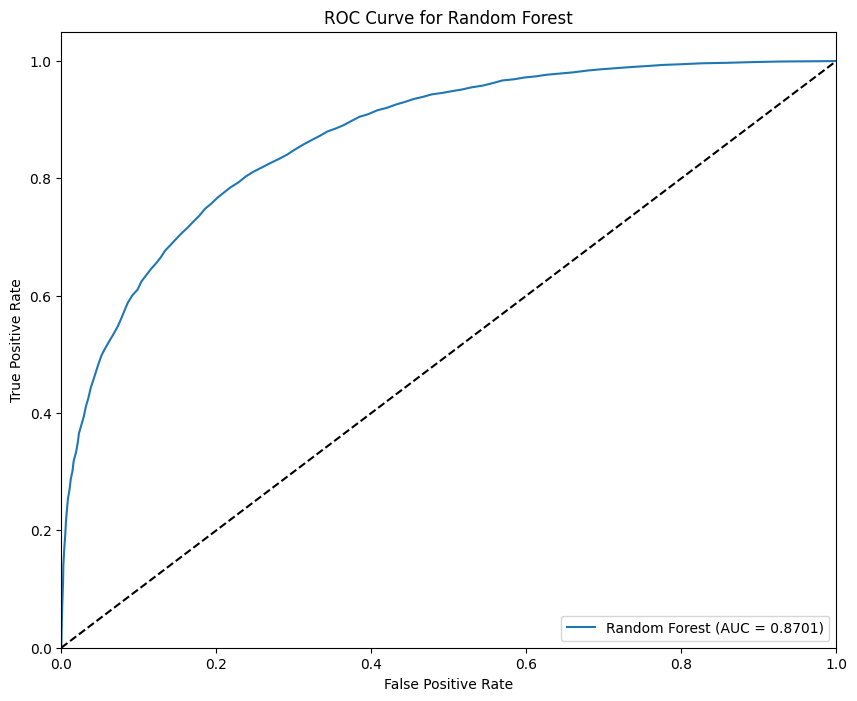

In [66]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize the models
rf = RandomForestClassifier(random_state=42)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

### Model 1: Logistic Regression

# Train the models
rf.fit(X_train, y_train)

# Predict probabilities for AUC
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Calculate AUC
auc_rf = roc_auc_score(y_test, y_prob_rf)

# Print AUC results
print(f"Random Forest AUC: {auc_rf:.4f}")

# Plot ROC Curves
plt.figure(figsize=(10, 8))

# Random Forest ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.4f})')


# Plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()


## Constructing a Confusion Matrix

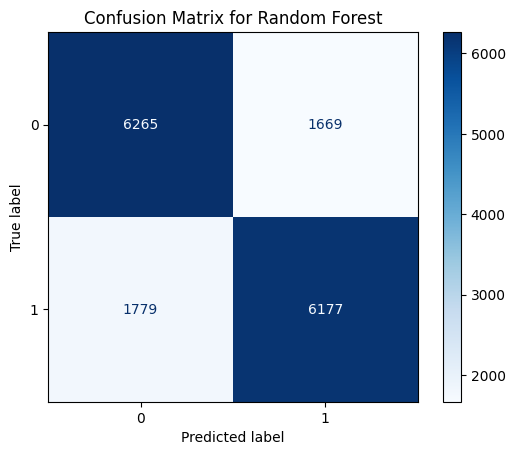

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict class labels for the test set
y_pred_rf = rf.predict(X_test)

# Construct the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest')
plt.show()


### Accuracy Calculation from the Confusion Matrix

To calculate the accuracy from the given confusion matrix, we can use use the formula:

$$
\text{Accuracy} = \frac{\text{True Positives (TP)} + \text{True Negatives (TN)}}{\text{Total Number of Instances}}
$$

From the confusion matrix:

- **True Positives (TP)** = 6177
- **True Negatives (TN)** = 6265
- **False Positives (FP)** = 1669
- **False Negatives (FN)** = 1779

$$
\text{Accuracy} = \frac{6177 + 6265}{6177 + 6265 + 1669 + 1779} = \frac{12442}{15890} \approx 0.7819 \text{ or } 78.3\%
$$


The accuracy of the Random Forest model based on this confusion matrix is approximately **78.3%**. This value represents the proportion of correct predictions (both true positives and true negatives) made by the model out of all predictions.


#### Evaluating the model using K-Fold Cross Validation, generating the ROC curve

Cross-Validated AUC: 0.8604


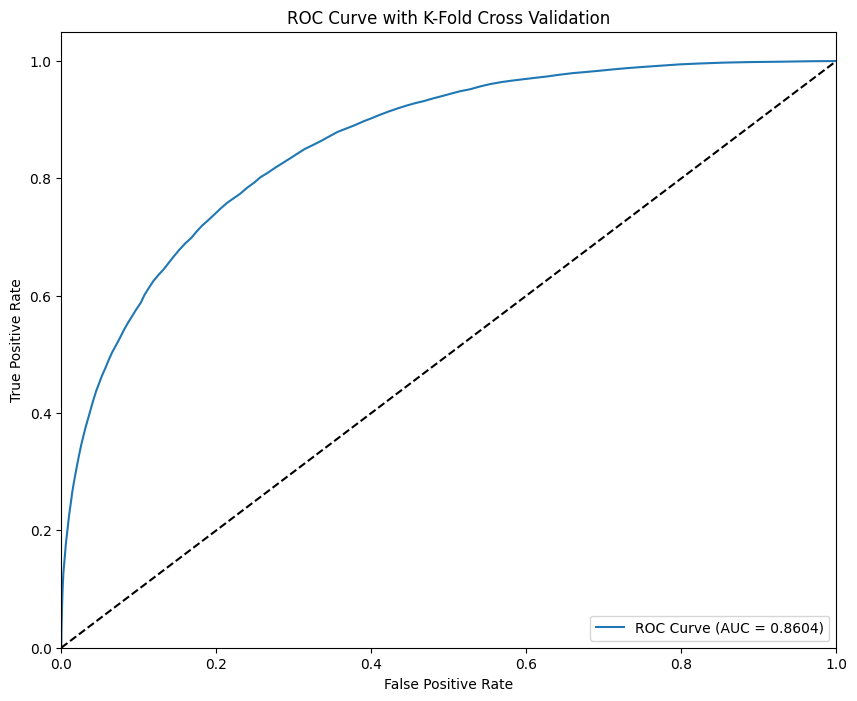

In [68]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Set up K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get predictions
y_pred_prob = cross_val_predict(rf, X_train, y_train, cv=kf, method="predict_proba")[:, 1]

# Calculate AUC score
auc_score = roc_auc_score(y_train, y_pred_prob)
print(f"Cross-Validated AUC: {auc_score:.4f}")

# Generate ROC Curve
fpr, tpr, _ = roc_curve(y_train, y_pred_prob)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with K-Fold Cross Validation')
plt.legend(loc='lower right')
plt.show()


In [69]:
# Train the model
rf.fit(X_train, y_train)

# Predict on the training set
train_preds = rf.predict(X_train)
train_auc = roc_auc_score(y_train, rf.predict_proba(X_train)[:, 1])

# Predict on the validation set
val_preds = rf.predict(X_test)
val_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

# Compare AUC scores
print(f"Training AUC: {train_auc:.4f}")
print(f"Validation AUC: {val_auc:.4f}")



Training AUC: 1.0000
Validation AUC: 0.8701


### Interpretation of Model Performance

- **Training AUC: 1.0000**: The model has achieved a perfect AUC score on the training set, indicating that it has perfectly classified the training data. This typically suggests that the model has learned the specific details of the training data very well.

- **Validation AUC: 0.8702**: The AUC score on the validation set is lower than on the training set, though still relatively high. This indicates that while the model performs well on unseen data, there is a noticeable drop in performance compared to the training set.

### Conclusion

- The significant difference between the Training AUC and Validation AUC suggests that the model is **overfitting** to the training data. The model has likely learned to capture noise or overly specific patterns in the training data that do not generalize well to new, unseen data.

### Next Steps

- To improve generalization and reduce overfitting, consider:
  - **Simplifying the model** (e.g., reducing the complexity, using fewer features).
  - **Applying regularization** techniques.
  - **Using cross-validation** to ensure more robust evaluation.
  - **Increasing the amount of training data** if possible.


### Applying L2 Regularization

Training AUC: 0.8907
Validation AUC: 0.8690
Performance Gap (Training AUC - Validation AUC): 0.0217


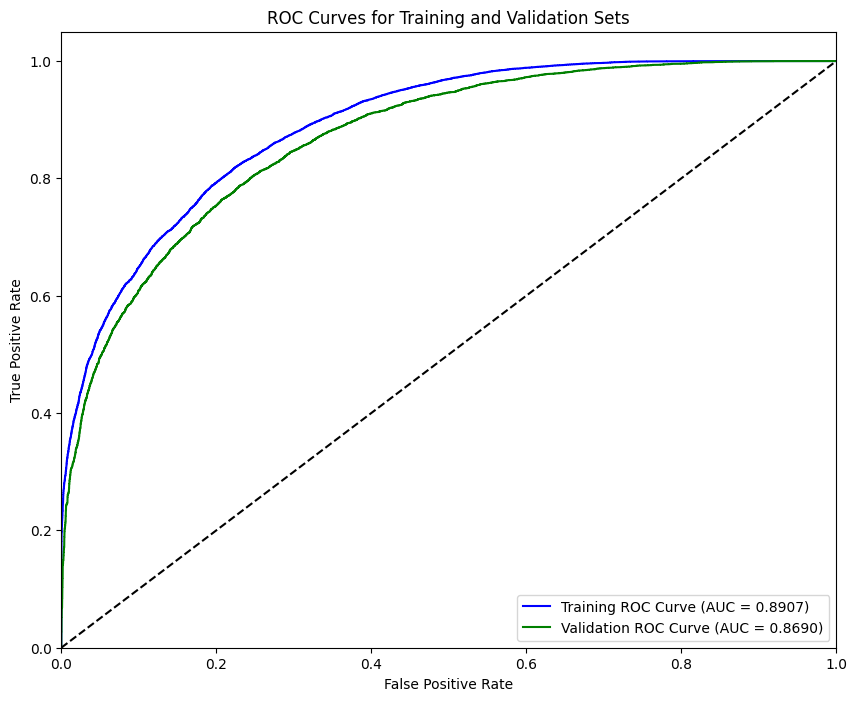

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Define a Random Forest model with regularization-like parameters
rf_l2 = RandomForestClassifier(
    n_estimators=100,  # Number of trees
    max_depth=10,      # Limiting the depth of each tree
    min_samples_split=10,  # Minimum number of samples required to split an internal node
    min_samples_leaf=5,    # Minimum number of samples required to be at a leaf node
    random_state=42
)

# Train the model
rf_l2.fit(X_train, y_train)

# Predict probabilities for the training set
y_prob_train = rf_l2.predict_proba(X_train)[:, 1]

# Predict probabilities for the validation set
y_prob_val = rf_l2.predict_proba(X_test)[:, 1]

# Calculate AUC for training and validation sets
auc_train = roc_auc_score(y_train, y_prob_train)
auc_val = roc_auc_score(y_test, y_prob_val)

print(f"Training AUC: {auc_train:.4f}")
print(f"Validation AUC: {auc_val:.4f}")

# Calculate the performance gap
performance_gap = auc_train - auc_val
print(f"Performance Gap (Training AUC - Validation AUC): {performance_gap:.4f}")

# Plot ROC Curves
fpr_train, tpr_train, _ = roc_curve(y_train, y_prob_train)
fpr_val, tpr_val, _ = roc_curve(y_test, y_prob_val)

plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, label=f'Training ROC Curve (AUC = {auc_train:.4f})', color='blue')
plt.plot(fpr_val, tpr_val, label=f'Validation ROC Curve (AUC = {auc_val:.4f})', color='green')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Training and Validation Sets')
plt.legend(loc='lower right')
plt.show()


As the Performance Gap is only 2%, that means the overfitting issues is solved.

### Applying Same preprocessing for test data

In [159]:
test_df.shape

(18000, 16)

In [71]:
# Calculate the number of missing values per column
missing_values_count = test_df.isnull().sum()

# Calculate the percentage of missing values per column
missing_values_percentage = (missing_values_count / len(test_df)) * 100

# Combine both counts and percentages into a DataFrame for better readability
missing_data = pd.DataFrame({
    'Missing Values': missing_values_count,
    'Percentage': missing_values_percentage
})

# Display columns with missing values
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)
print(missing_data)


                     Missing Values  Percentage
stack_experience               4524   25.133333
disability                     1258    6.988889
B                              1150    6.388889
education                      1026    5.700000
sex                            1003    5.572222
C                               964    5.355556
D                               882    4.900000
years_of_experience             876    4.866667
prev_salary                     862    4.788889
mental_issues                   822    4.566667
age_group                       806    4.477778
A                               726    4.033333
is_dev                          717    3.983333
country                         673    3.738889
worked_in_the_past              544    3.022222


In [72]:
# Count the number of technologies in 'stack_experience'
test_df['num_technologies'] = test_df['stack_experience'].apply(lambda x: len(x.split(';')) if pd.notnull(x) else np.nan)

# Step 2: Impute missing values with the mean
mean_technologies = test_df['num_technologies'].mean()
test_df['num_technologies'] = test_df['num_technologies'].fillna(mean_technologies)

# Converting all float values to integer
test_df['num_technologies'] = test_df['num_technologies'].astype(int)

# Verify the results
print(test_df[['stack_experience', 'num_technologies']].head())
print(f"Missing values in 'num_technologies' after imputation: {test_df['num_technologies'].isnull().sum()}")

                                    stack_experience  num_technologies
0  C#;HTML/CSS;JavaScript;SQL;ASP.NET Core ;Blazo...                 9
1  Bash/Shell;HTML/CSS;JavaScript;Python;Docker;D...                 9
2                                                NaN                13
3  Bash/Shell;C;C#;C++;HTML/CSS;Java;JavaScript;K...                35
4  C#;HTML/CSS;JavaScript;Kotlin;Python;SQL;ASP.N...                12
Missing values in 'num_technologies' after imputation: 0


In [73]:
# Removing the 'stack_experience' column as we've new generated column named "num_technologies"
test_df.drop('stack_experience', axis=1, inplace=True)

# filling all the missing value with Most Frequent Value
test_df['disability'] = test_df['disability'].fillna(test_df['disability'].mode()[0])
test_df.isnull().sum()

ID                        0
worked_in_the_past      544
age_group               806
disability                0
is_dev                  717
education              1026
sex                    1003
mental_issues           822
years_of_experience     876
A                       726
B                      1150
C                       964
D                       882
country                 673
prev_salary             862
num_technologies          0
dtype: int64

In [74]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Create a copy of the dataframe with no missing values in 'years_of_experience'
df_no_na = test_df.dropna(subset=['years_of_experience'])

# Features for prediction (excluding 'years_of_experience' and 'label')
features = ['age_group', 'education', 'worked_in_the_past']

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(df_no_na[features], drop_first=True)
y = df_no_na['years_of_experience']

# Train the model
model = LinearRegression()
model.fit(X, y)

# Predict missing values
X_missing = pd.get_dummies(test_df.loc[test_df['years_of_experience'].isnull(), features], drop_first=True)
predicted_values = model.predict(X_missing)

# Round the predicted values to the nearest integer and convert to int
predicted_values_rounded = np.round(predicted_values).astype(int)

# Impute the missing values with the rounded predictions
test_df.loc[test_df['years_of_experience'].isnull(), 'years_of_experience'] = predicted_values_rounded

# Ensure the entire column is treated as integers
test_df['years_of_experience'] = test_df['years_of_experience'].astype(int)

test_df.isnull().sum()


ID                        0
worked_in_the_past      544
age_group               806
disability                0
is_dev                  717
education              1026
sex                    1003
mental_issues           822
years_of_experience       0
A                       726
B                      1150
C                       964
D                       882
country                 673
prev_salary             862
num_technologies          0
dtype: int64

In [75]:
# Fill missing values in 'worked_in_the_past' based on 'years_of_experience'
test_df.loc[(test_df['worked_in_the_past'].isnull()) & (test_df['years_of_experience'] > 0), 'worked_in_the_past'] = 'T'
test_df.loc[(test_df['worked_in_the_past'].isnull()) & (test_df['years_of_experience'] <= 0), 'worked_in_the_past'] = 'F'

# Impute the missing values in 'age_group' based on 'years_of_experience'
test_df.loc[(test_df['age_group'].isnull()) & (test_df['years_of_experience'] > 17), 'age_group'] = 'old'
test_df.loc[(test_df['age_group'].isnull()) & (test_df['years_of_experience'] <= 17), 'age_group'] = 'young'

# Filling all the missing value with Most Frequent Value
test_df['is_dev'] = test_df['is_dev'].fillna(test_df['is_dev'].mode()[0])
test_df.isnull().sum()

ID                        0
worked_in_the_past        0
age_group                 0
disability                0
is_dev                    0
education              1026
sex                    1003
mental_issues           822
years_of_experience       0
A                       726
B                      1150
C                       964
D                       882
country                 673
prev_salary             862
num_technologies          0
dtype: int64

In [76]:
# Filling all the missing value with Most Frequent Value
test_df['mental_issues'] = test_df['mental_issues'].fillna(test_df['mental_issues'].mode()[0])

# Filling all the missing value with Most Frequent Value
test_df['sex'] = test_df['sex'].fillna(test_df['sex'].mode()[0])

# As the mmpute missing values are only 5% in 'education', imputing with the most frequent category
test_df['education'] = test_df['education'].fillna(test_df['education'].mode()[0])

test_df.isnull().sum()

ID                        0
worked_in_the_past        0
age_group                 0
disability                0
is_dev                    0
education                 0
sex                       0
mental_issues             0
years_of_experience       0
A                       726
B                      1150
C                       964
D                       882
country                 673
prev_salary             862
num_technologies          0
dtype: int64

In [77]:
threshold = 0.01  # if a country makes up less than 1% of the data

# Group rare countries into "Other"
country_counts = test_df['country'].value_counts(normalize=True)
rare_countries = country_counts[country_counts < threshold].index
test_df['country'] = test_df['country'].replace(rare_countries, 'Other')

# Now fill missing values with 'Other'
test_df['country'] = test_df['country'].fillna('Other')

# Filling all the missing value with Most Frequent Value
test_df['C'] = test_df['C'].fillna(test_df['C'].mode()[0])

# Impute missing values in 'A', 'B', and 'D' with the median
test_df['A'] = test_df['A'].fillna(test_df['A'].median())
test_df['B'] = test_df['B'].fillna(test_df['B'].median())
test_df['D'] = test_df['D'].fillna(test_df['D'].median())

test_df.isnull().sum()


ID                       0
worked_in_the_past       0
age_group                0
disability               0
is_dev                   0
education                0
sex                      0
mental_issues            0
years_of_experience      0
A                        0
B                        0
C                        0
D                        0
country                  0
prev_salary            862
num_technologies         0
dtype: int64

In [78]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Create a copy of the dataframe with no missing values in 'prev_salary'
df_no_na = test_df.dropna(subset=['prev_salary'])

# Features for prediction 
features = ['age_group', 'education', 'worked_in_the_past', 'years_of_experience']

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(df_no_na[features], drop_first=True)
y = df_no_na['prev_salary']

# Train the model
model = LinearRegression()
model.fit(X, y)

# Predict missing values
X_missing = pd.get_dummies(test_df.loc[test_df['prev_salary'].isnull(), features], drop_first=True)
predicted_values = model.predict(X_missing)

# Round the predicted values to the nearest integer and convert to int
predicted_values_rounded = np.round(predicted_values).astype(int)

# Impute the missing values with the rounded predictions
test_df.loc[test_df['prev_salary'].isnull(), 'prev_salary'] = predicted_values_rounded

# Ensure the entire column is treated as integers
test_df['prev_salary'] = test_df['prev_salary'].astype(int)

test_df.isnull().sum()


ID                     0
worked_in_the_past     0
age_group              0
disability             0
is_dev                 0
education              0
sex                    0
mental_issues          0
years_of_experience    0
A                      0
B                      0
C                      0
D                      0
country                0
prev_salary            0
num_technologies       0
dtype: int64

In [79]:
# List of nominal columns to be one-hot encoded
nominal_columns = ['worked_in_the_past', 'disability', 'is_dev', 'sex', 'mental_issues', 'C', 'country']

# Apply one-hot encoding using pandas get_dummies
test_df = pd.get_dummies(test_df, columns=nominal_columns)

# Convert any boolean columns to integers
for column in test_df.columns:
    if test_df[column].dtype == 'bool':  # Check if the column is of boolean type
        test_df[column] = test_df[column].astype(int)



# Ordinal column: age_group
# Assuming the order is "young" < "old"
# Since LabelEncoder does not respect the order, we'll map it manually if necessary
test_df['age_group_encoded'] = test_df['age_group'].map({'young': 0, 'old': 1})

# Ordinal column: education
# Assuming the order is "High school" < "BA/BSc" < "MA/MSc" < "PhD"
# Encode the education column
education_order = ['other','High school', 'BA/BSc', 'MA/MSc', 'PhD']
test_df['education_encoded'] = test_df['education'].apply(lambda x: education_order.index(x) if x in education_order else -1)


# Removeing the original 'age_group' and 'education' columns
test_df.drop(['age_group', 'education'], axis=1, inplace=True)

test_df.head()

,ID,years_of_experience,A,B,D,prev_salary,num_technologies,worked_in_the_past_F,worked_in_the_past_T,disability_No,...,country_Poland,country_Russian Federation,country_Spain,country_Sweden,country_Switzerland,country_Turkey,country_United Kingdom of Great Britain and Northern Ireland,country_United States of America,age_group_encoded,education_encoded
0,48786,5,9.731222,3.0,178.596322,60000,9,1,0,1,...,0,0,0,0,0,0,0,1,0,2
1,53074,5,-2.482247,7.0,179.067238,27264,9,0,1,1,...,0,0,0,0,0,0,0,0,1,0
2,11758,20,7.969130,15.0,180.386346,87121,13,0,1,1,...,0,0,0,0,0,0,0,0,1,2
3,49289,20,-3.644784,7.0,181.329814,120127,35,0,1,1,...,0,0,0,0,0,0,0,0,1,2
4,56787,40,-5.277558,34.0,179.758801,101430,12,1,0,1,...,0,0,0,0,0,0,1,0,1,0


In [80]:

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical columns
test_df[columns] = scaler.fit_transform(test_df[columns])

# Verify normalization
test_df[columns].describe()


,years_of_experience,A,B,D,prev_salary,num_technologies
count,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04
mean,-6.118562e-17,2.644798e-17,7.144902e-17,-7.487344e-16,1.215818e-16,1.342136e-16
std,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00
min,-1.532564e+00,-3.614590e+00,-1.166978e+00,-3.855780e+00,-1.398904e+00,-2.016497e+00
25%,-7.805258e-01,-6.554027e-01,-7.775478e-01,-6.509580e-01,-7.703520e-01,-5.384747e-01
50%,-2.433559e-01,-5.301633e-02,-2.583076e-01,1.304777e-02,-2.048598e-01,-4.580046e-02
75%,6.161160e-01,5.858329e-01,3.907427e-01,6.611081e-01,5.512409e-01,2.826490e-01
max,3.839136e+00,7.892458e+00,5.323524e+00,4.088127e+00,3.235943e+00,1.259951e+01


In [81]:
test_df

,ID,years_of_experience,A,B,D,prev_salary,num_technologies,worked_in_the_past_F,worked_in_the_past_T,disability_No,...,country_Poland,country_Russian Federation,country_Spain,country_Sweden,country_Switzerland,country_Turkey,country_United Kingdom of Great Britain and Northern Ireland,country_United States of America,age_group_encoded,education_encoded
0,48786,-0.995394,0.916627,-0.777548,-0.915576,-0.157177,-0.702699,1,0,1,...,0,0,0,0,0,0,0,1,0,2
1,53074,-0.995394,-1.027493,-0.258308,-0.476531,-0.834675,-0.702699,0,1,1,...,0,0,0,0,0,0,0,0,1,0
2,11758,0.616116,0.636140,0.780173,0.753303,0.404114,-0.045800,0,1,1,...,0,0,0,0,0,0,0,0,1,2
3,49289,0.616116,-1.212544,-0.258308,1.632919,1.087200,3.567144,0,1,1,...,0,0,0,0,0,0,0,0,1,2
4,56787,2.764796,-1.472446,3.246564,0.168228,0.700251,-0.210025,1,0,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,47415,2.872230,-1.071158,2.986944,0.026922,1.025092,-0.045800,0,1,1,...,0,0,0,0,0,0,0,0,1,1
17996,41780,0.401248,0.709823,-0.777548,0.112913,-0.167359,-1.031149,0,1,1,...,0,0,0,0,0,0,0,0,0,3
17997,2625,0.508682,1.437373,0.260933,-1.254159,-0.640713,0.775323,0,1,1,...,0,0,0,0,0,0,0,0,1,0
17998,4019,-0.673092,-0.708451,-0.517928,0.107817,-0.246603,-1.031149,0,1,1,...,1,0,0,0,0,0,0,0,0,3


In [82]:
test_data = test_df.drop(columns=['ID'])

In [83]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=6)
test_reduced = pca.fit_transform(test_data)

# Check the shape of the reduced dataset
print(f"Shape of X after PCA: {test_reduced.shape}")

Shape of X after PCA: (18000, 6)


# Part 5: Generating prediction

In [84]:
# Predict class labels for the test data
predicted_classes = rf_l2.predict(test_reduced)

# Predict probabilities for the test data
predicted_probabilities = rf_l2.predict_proba(test_reduced)[:, 1]  # Assuming binary classification


In [85]:
len(predicted_classes)

18000

In [86]:
# Create a DataFrame with the predictions and include the ID column
results = pd.DataFrame({
    'ID': test_df['ID'],  # Add the ID column from the test DataFrame
    'Predicted_Class': predicted_classes,
    'Prediction_Probability': predicted_probabilities
})

# Save the results to a CSV file
results.to_csv(f'results_generated.csv', index=False)


# Part 6: Tools Not Covered in the Course

### Methods/ Tools/ Techniques/Topics that covers in this notebook

### 1. **Data Preprocessing**
   - Handling Missing Values
     - Imputation Techniques (e.g., Mean/Median Imputation)
     - Imputation according to logic
     - Imputation using model creation
   - Handling Outliers
     - Boxplot Analysis
     - Removing/Transforming Outliers
   - One-Hot Encoding and Label Encoding
     - Handling Categorical Variables
   - Feature Scaling
     - Normalization (StandardScaler)
   - Feature Selection
     - Importance-based Selection
   - Dimensionality Reduction
     - Principal Component Analysis (PCA)
  

### 2. **Model Development**
   - Data Splitting
     - Train-Test Split
   - Model Selection
     - Logistic Regression
     - K-Nearest Neighbors (KNN)
     - Naive Bayes Classifier
     - Ensemble Learning
     - Random Forest
     - AdaBoost

### 3. **Model Evaluation**
   - Performance Metrics
     - Accuracy
     - Area Under the Curve (AUC)
   - Confusion Matrix
   - ROC Curve
   - K-Fold Cross-Validation

### 4. **Hyperparameter Tuning**
   - Grid Search Cross-Validation
   - Regularization Techniques
     - L2 Regularization (Ridge)

### 5. **Model Generalization**
   - Bias-Variance Trade-Off
   - Overfitting & Underfitting Analysis
   - Simplifying the Model

### 6. **Data Augmentation**
   - Resampling Techniques (e.g., SMOTE)

### 7. **Results and Output**
   - Generating Predictions
   - Saving Results to CSV

### 8. **Tools and Libraries**
   - Python
   - Jupyter Notebook
   - Pandas
   - NumPy
   - Scikit-learn
   - Matplotlib
   - Seaborn

